# Data Pre-processing

In [1]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! unzip '/content/drive/MyDrive/3rhcxvngkl_(2)_7ul_i8dg2hf (1).zip'

Archive:  /content/drive/MyDrive/3rhcxvngkl_(2)_7ul_i8dg2hf (1).zip
  inflating: train(1).csv            


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/train(1).csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


# Exploratory Data Analysis

In [4]:
# Check number of rows and columns in datasets
print(df.shape)

(595212, 59)


The dataset consists of 595212 rows and 59 columns. 1st column is ID, 2nd Column is target labels and remaining 57 columns are the features.

In [5]:
# Name of the columns
print(df.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [6]:
df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

The suffixes cat and bin on each column name indicates the categorical and binary values. Column names without suffix would be continous or Ordinal data.

### Missing Values

In [7]:
# Checking the null
print(df.isnull().sum())

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


There are no null values in the datasets. However as mentioned in the dataset description that null values are indicated by -1

In [8]:
# As -1 indicating missing value, Find the percentage of missing values
df_missing_values = pd.DataFrame({'column':df.columns, 'missing_%age':((df == -1).sum()/df.shape[0])*100}, index=None)
df_missing_values = (df_missing_values[df_missing_values['missing_%age']>0].sort_values(by=['missing_%age'],ascending=False))
df_missing_values

,column,missing_%age
ps_car_03_cat,ps_car_03_cat,69.089837
ps_car_05_cat,ps_car_05_cat,44.782531
ps_reg_03,ps_reg_03,18.106490
ps_car_14,ps_car_14,7.160474
ps_car_07_cat,ps_car_07_cat,1.930237
ps_ind_05_cat,ps_ind_05_cat,0.975955
ps_car_09_cat,ps_car_09_cat,0.095596
ps_ind_02_cat,ps_ind_02_cat,0.036290
ps_car_01_cat,ps_car_01_cat,0.017977
ps_ind_04_cat,ps_ind_04_cat,0.013945


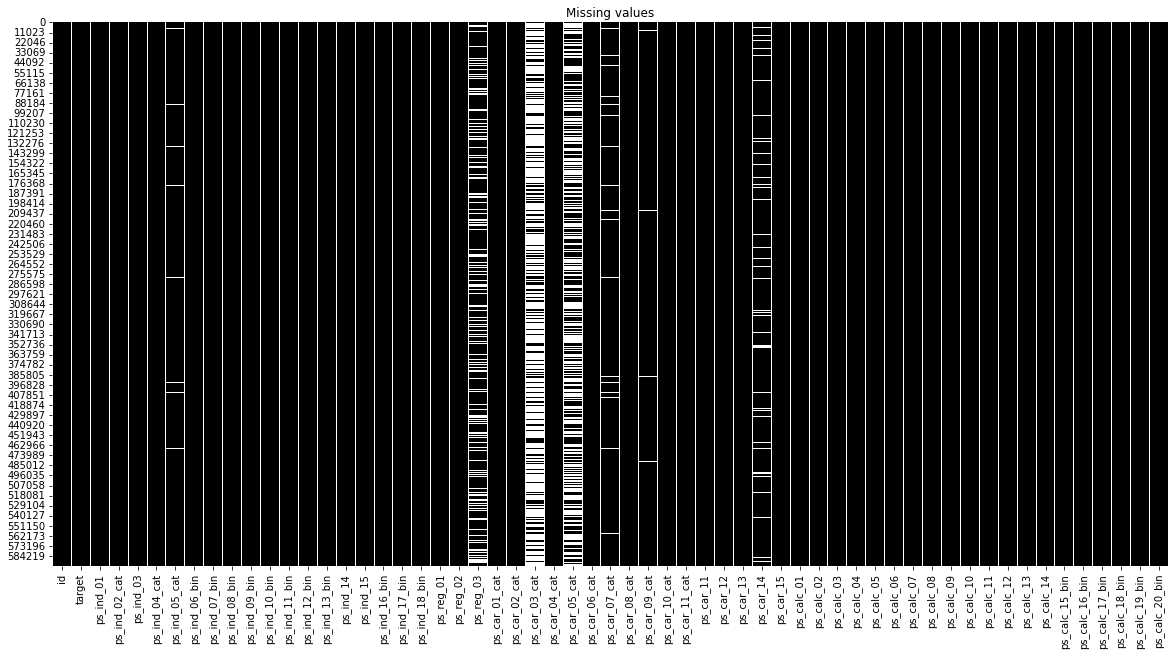

In [9]:
# Heatmap for the visualisation of missing values
plt.figure(figsize=(20,10))
sns.heatmap(df == -1,cmap='gray',cbar=False)
plt.title("Missing values")
plt.show()

As we can see that there are 12 columns which have missing values, out of which 8 columns have missing values less than 2 percent.
We will drop 2 columns namely ps_car_03_cat & ps_car_05_cat due to high missing values.
We will impute the other 8 columns with the median value

In [10]:
drop_column = ['ps_car_03_cat','ps_car_05_cat']
impute_columns = ['ps_reg_03', 'ps_car_14', 'ps_car_07_cat','ps_ind_05_cat','ps_car_09_cat',
                  'ps_ind_02_cat', 'ps_car_01_cat','ps_ind_04_cat', 'ps_car_11','ps_car_12']

df_clean = df.drop(drop_column, axis = 1)

In [11]:
# Imputing the columns whuch have lower missing values percentage
for col in impute_columns:
  df_clean[col].replace(-1,df_clean[col].median(),inplace=True)

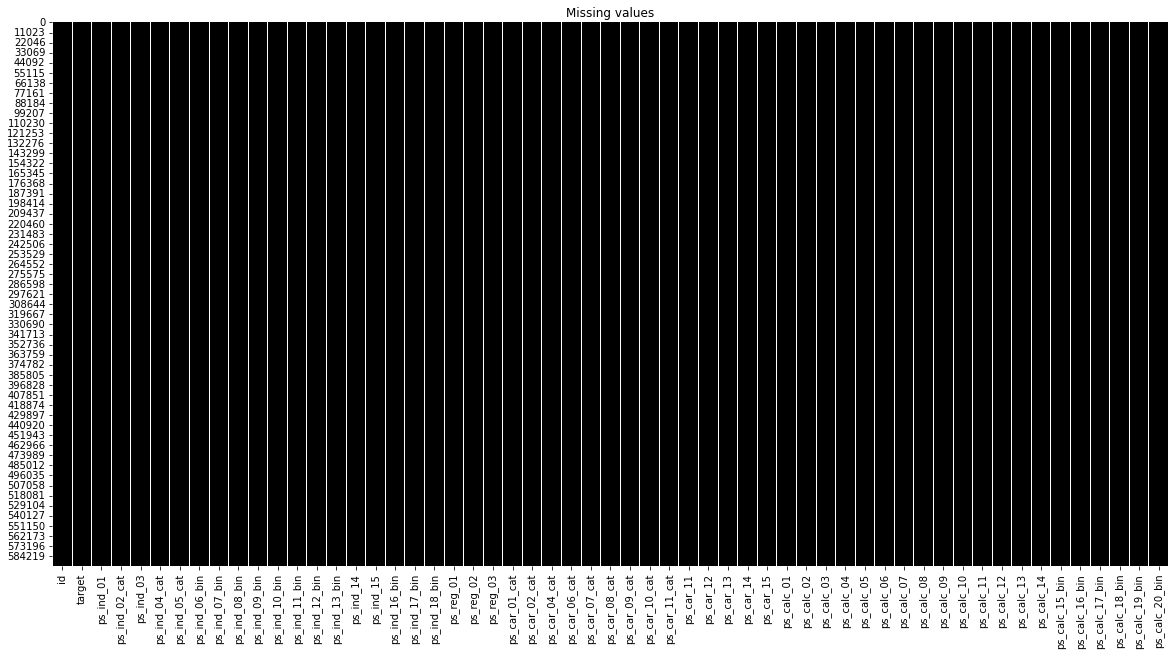

In [12]:
# Heatmap for the visualisation of missing values
plt.figure(figsize=(20,10))
sns.heatmap(df_clean == -1,cmap='gray',cbar=False)
plt.title("Missing values")
plt.show()

#### Target Variables Visualisation

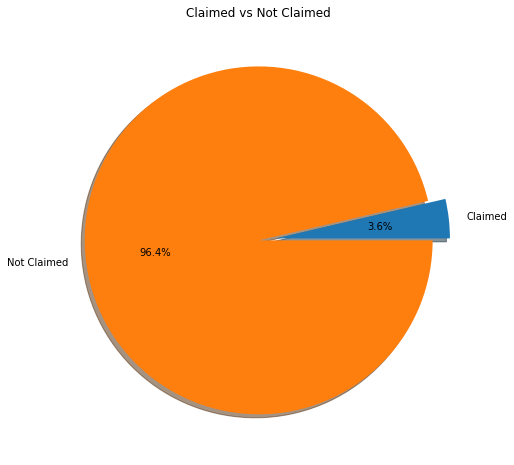

In [13]:
plt.figure(figsize=(10,8))
plt.title('Claimed vs Not Claimed')
labels = ('Claimed','Not Claimed')
data =(((df_clean['target'].sum())/df_clean.shape[0])*100, ((df_clean.shape[0] - df_clean['target'].sum())/(df_clean.shape[0]))*100)
explode = (0.1,0)

plt.pie(data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()


We can see that the labels are binary, where 0 indicates no-claim and 1 indicates claim. The target variables are not distributed equally i.e. the data is not balanced.

3.6% of the people claimed insurance and 96.4% did not claim insurance.

**Feature Analysis**



Binary Features

No of Binary Features: 17


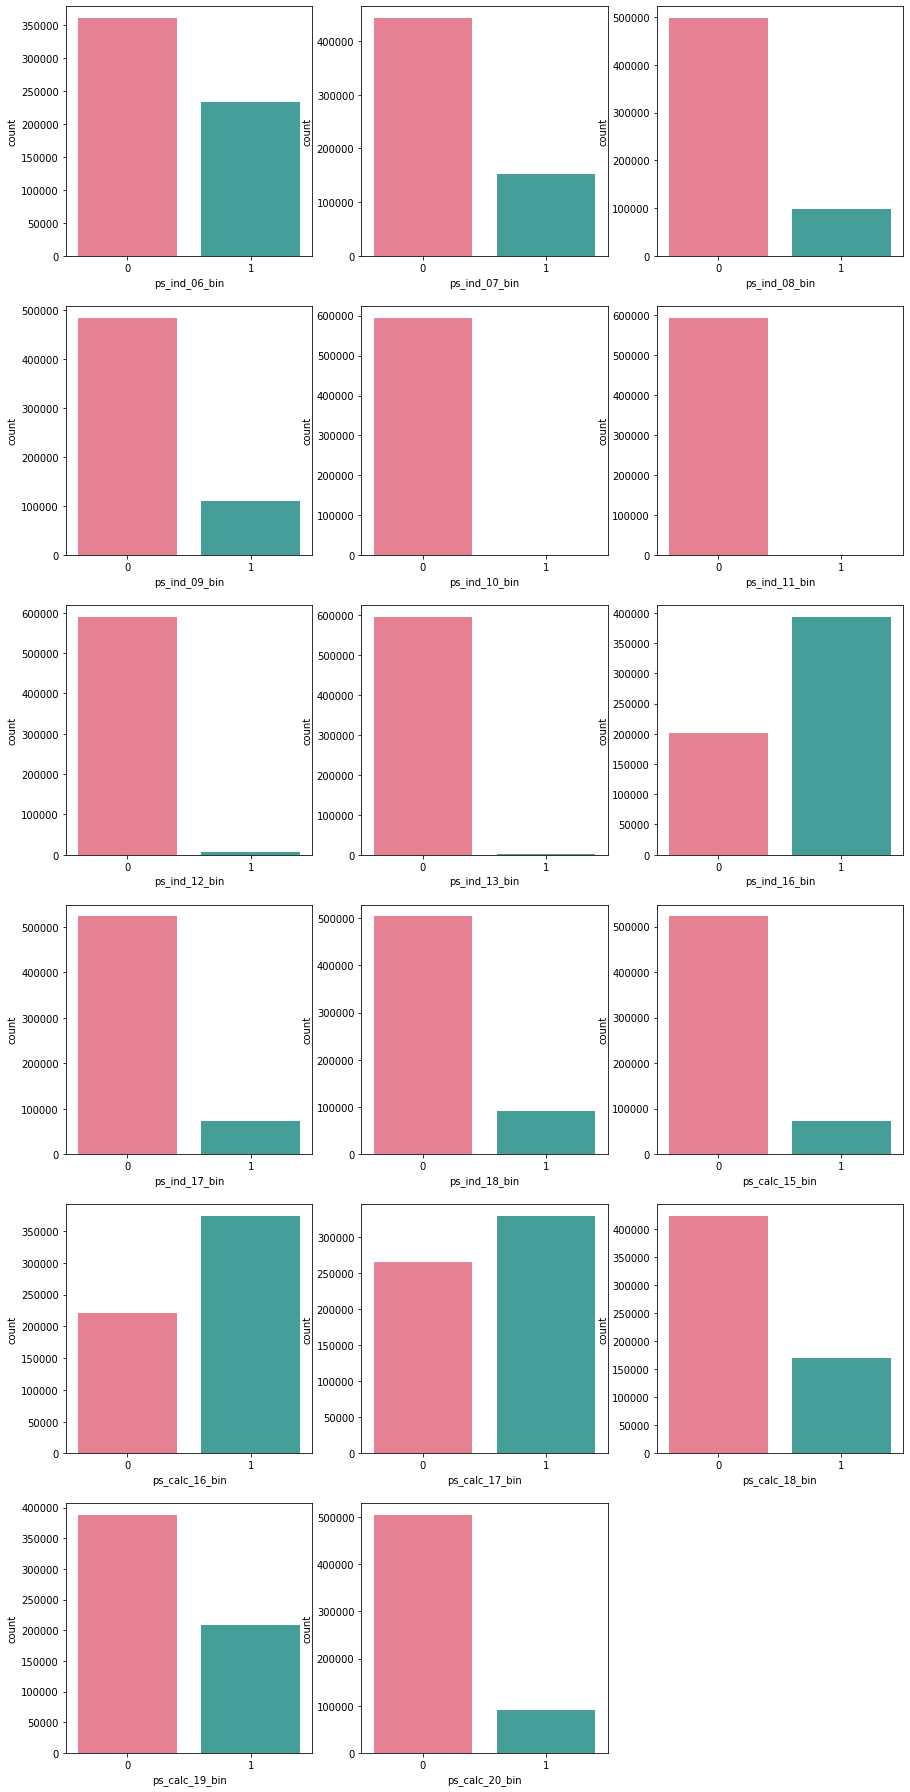

In [14]:
features = df_clean.columns.to_list()
binary_features = [col for col in features if 'bin' in col]
print('No of Binary Features:', len(binary_features))

#visualization of binary_features using bar plot
rows = len(binary_features)
cols = 3   
n_sub = 1      
fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(binary_features)):
    plt.subplot(rows, cols, n_sub)
    sns.countplot(x= df_clean[binary_features[i]],palette="husl")
    n_sub+=1   
plt.show()





* There are 17 Binary features.
*  'ps_ind_10_bin','ps_ind_11_bin', 'ps_ind_12_bin','ps_ind_13_bin' are almost 0.
*  The 0's are high in 'ps_ind_6_bin', 'ps_ind_7_bin', 'ps_ind_8_bin', 'ps_ind_9_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', and 'ps_calc_20_bin' 


**Categorical Features**

No of Categorical Features: 12


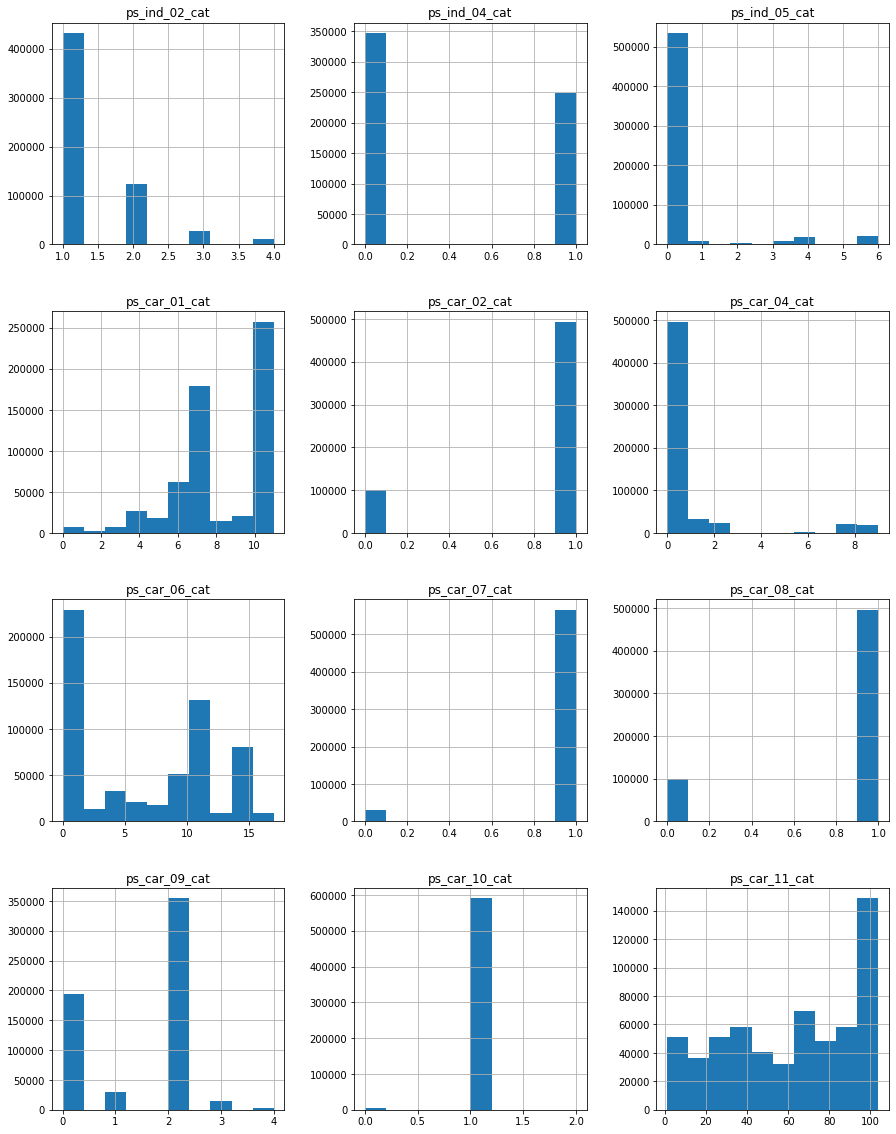

In [15]:
categorical_features = [col for col in features if 'cat' in col] 
df_cat_features = pd.DataFrame({'Categorical Features':categorical_features})

print('No of Categorical Features:', len(categorical_features))

#visualization with histogram
plt.rcParams['figure.figsize'] = (15,20)
df_clean.hist(column=categorical_features) 
plt.show()



*   There are 14 categorical features in the dataset out of which we have removed 2 due to the presence of too much missing values
* 'ps_car_11' has too many categories.
* 'ps_ind_04_cat', 'ps_car_02_cat, 'ps_car_07_cat', and 'ps_car_08_cat' have exactly two categories, but it is not named binary. The reason can be that the dataset doesnot have more values for other categories

*  'ps_ind_05_cat and 'ps_car_04_cat' have the most frequnency in their 0 category.
*   'ps_car_10_cat' is  always 1





**Interval Variables**

No of Interval Features: 10
['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


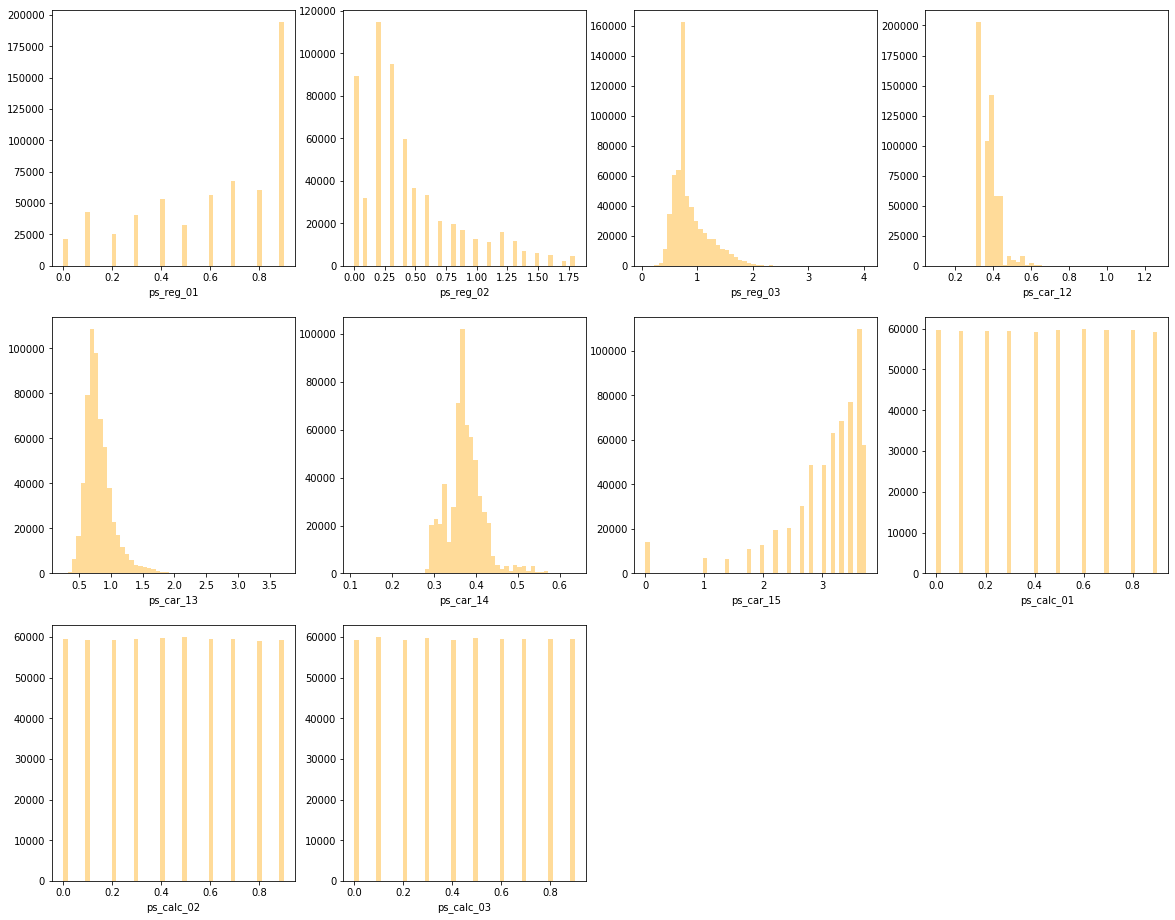

In [17]:
interval_variables = df_clean.select_dtypes(include=['float64']).columns.to_list()
print('No of Interval Features:', len(interval_variables))

print(interval_variables)
#visualization of interval_variables using bar plot
n_row = len(interval_variables)
n_col = 4   
n_sub = 1      
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(interval_variables)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(df_clean[interval_variables[i]], kde=False,color='orange')
    n_sub+=1
plt.show()



*  The values in 'ps_calc_01', 'ps_calc_02' and 'ps_calc_03' are equally distributed and are in between 0 and 1.




### Ordinal Features

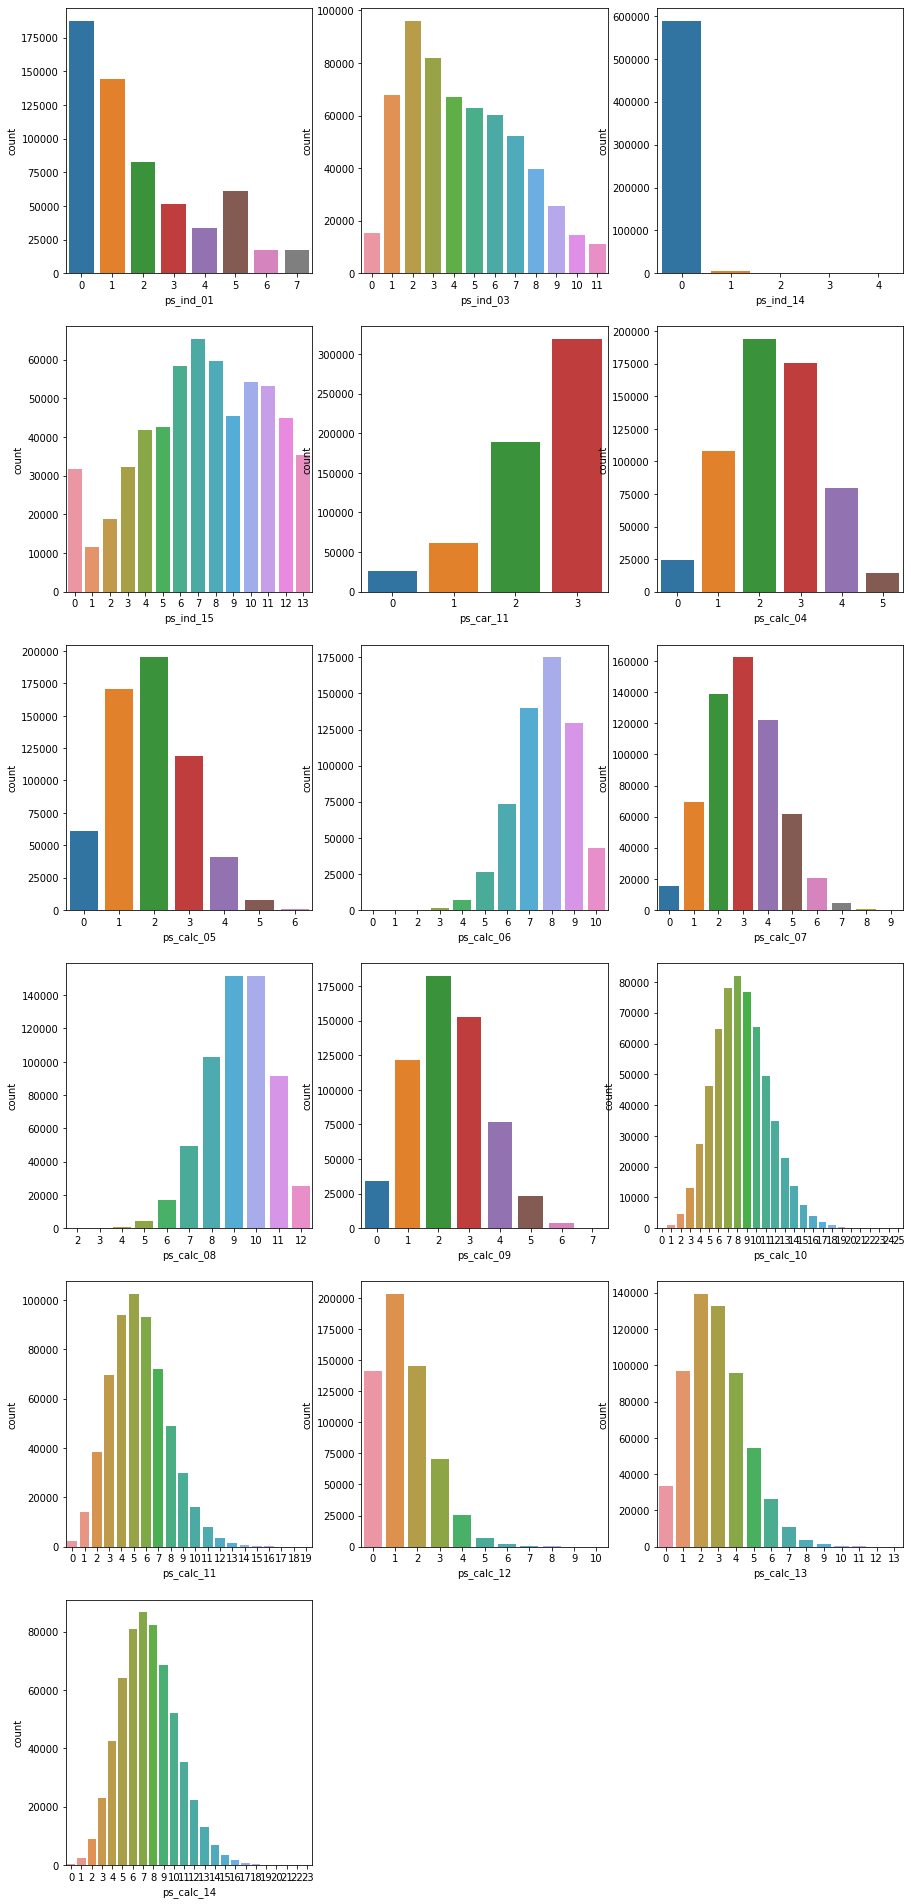

In [19]:
ordinal_variables = df_clean.select_dtypes(include=['int64']).columns.to_list()
# finding the ordinal features by excluding binary, category, id and target column
df_ordinal_features = [col for col in ordinal_variables if('bin' not in col and 'cat' not in col and 'id' not in col and 'target' not in col)]

#visualization of interval_variables using bar plot
rows = len(df_ordinal_features)
cols = 3   
n_sub = 1      
fig = plt.figure(figsize=(15,25))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(df_ordinal_features)):
    plt.subplot(rows, cols, n_sub)
    sns.countplot(x= df_clean[df_ordinal_features[i]])
    n_sub+=1   
plt.show()



*   There are 16 Ordinal features
*   'ps_ind_14' has almost 0's





### Correlation

**Correlation with ordinal features**

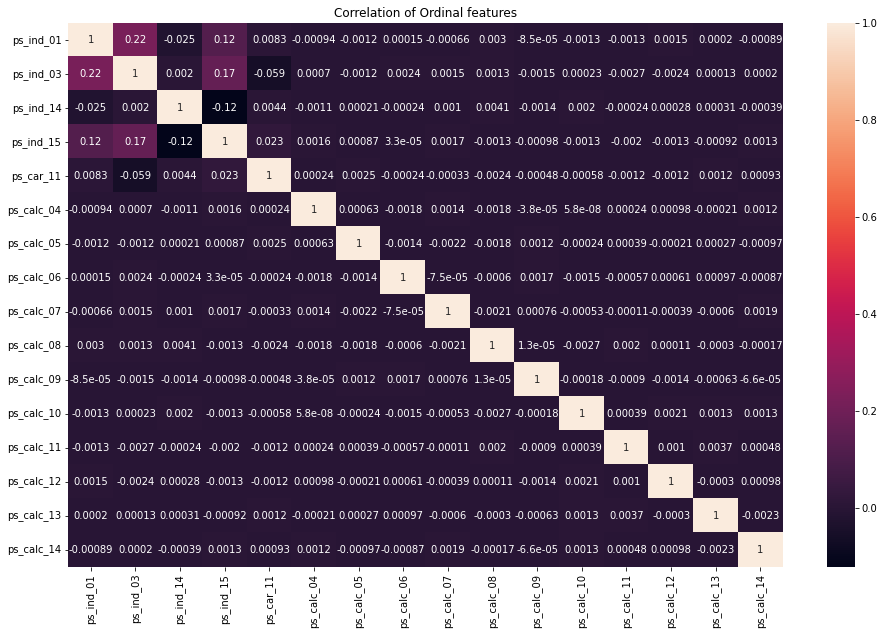

In [20]:
x = df_clean[df_ordinal_features]
plt.figure(figsize=(16,10))
sns.heatmap(x.corr(), annot=True)
plt.title('Correlation of Ordinal features')
plt.show()

**Correlation with interval features**

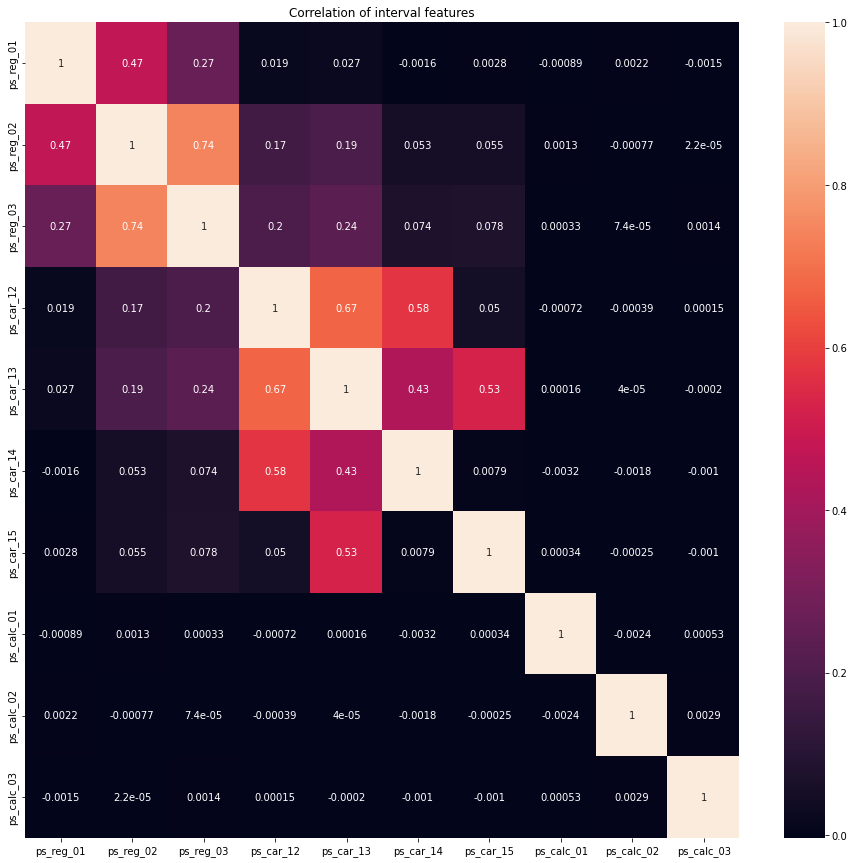

In [21]:
y = df_clean[interval_variables]
plt.figure(figsize=(16,15))
sns.heatmap(y.corr(), annot=True)
plt.title('Correlation of interval features')
plt.show()

**High Correlation between:**


*   'ps_reg_01' and 'ps_reg_02'
*   'ps_reg_03' and 'ps_reg_02'
*   'ps_car_12' and 'ps_car_14'
*   'ps_car_12' and 'ps_car_13'
*   'ps_car_13' and 'ps_car_15'
*   'ps_car_13' and 'ps_car_14'


















**Splitting Data Into X and y**

In [22]:
X = df_clean.drop(['id','target'], axis = 1)
y = df_clean['target']

#split the data into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(476169, 55) (119043, 55)
(476169,) (119043,)


## Feature Engineering


**Dimensionality Reduction** 

Based on the correlation matrix we found high correlation between some features. We can drop one of the 2 highly correlated features for dimensionality reduction. Later we can apply PCA for further reduction.

We will drop the features 'ps_reg_02', 'ps_car_12' and 'ps_car_13'

In [23]:
X_train = X_train.drop(['ps_reg_02', 'ps_car_12','ps_car_13'], axis=1)
X_test = X_test.drop(['ps_reg_02', 'ps_car_12','ps_car_13'], axis=1)
print(X_train.shape, X_test.shape)

(476169, 52) (119043, 52)


In [24]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,4,2,5,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0,0.9,1.043731,11,1,0,14,1,1,2,1,42,2,0.393700,3.316625,0.7,0.3,0.3,1,1,9,4,10,3,11,6,2,5,16,1,1,0,1,1,0
1,1,1,3,1,0,1,0,0,0,0,0,0,0,0,5,1,0,0,0.6,0.900694,6,1,0,11,1,1,2,1,17,2,0.390384,3.464102,0.4,0.2,0.2,2,4,8,2,10,2,8,4,0,3,8,0,1,1,0,0,0
2,1,1,6,0,6,1,0,0,0,0,0,0,0,0,6,1,0,0,0.3,0.538516,7,1,0,1,1,1,2,1,65,3,0.352136,1.732051,0.6,0.0,0.7,1,4,6,4,10,4,6,5,1,1,11,0,1,1,0,1,0
3,2,2,0,0,0,0,0,0,1,0,0,0,0,0,7,0,1,0,0.6,0.704894,3,1,0,0,1,1,2,1,32,1,0.367423,1.000000,0.9,0.1,0.4,2,1,6,3,8,2,7,5,3,4,3,0,1,1,0,0,0
4,1,2,2,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.3,0.953284,7,1,0,0,1,1,1,1,87,3,0.361525,3.316625,0.1,0.1,0.2,2,1,9,4,9,2,8,8,0,1,11,0,1,1,0,1,0


**Scaling**

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

No. of Numerical features :  23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


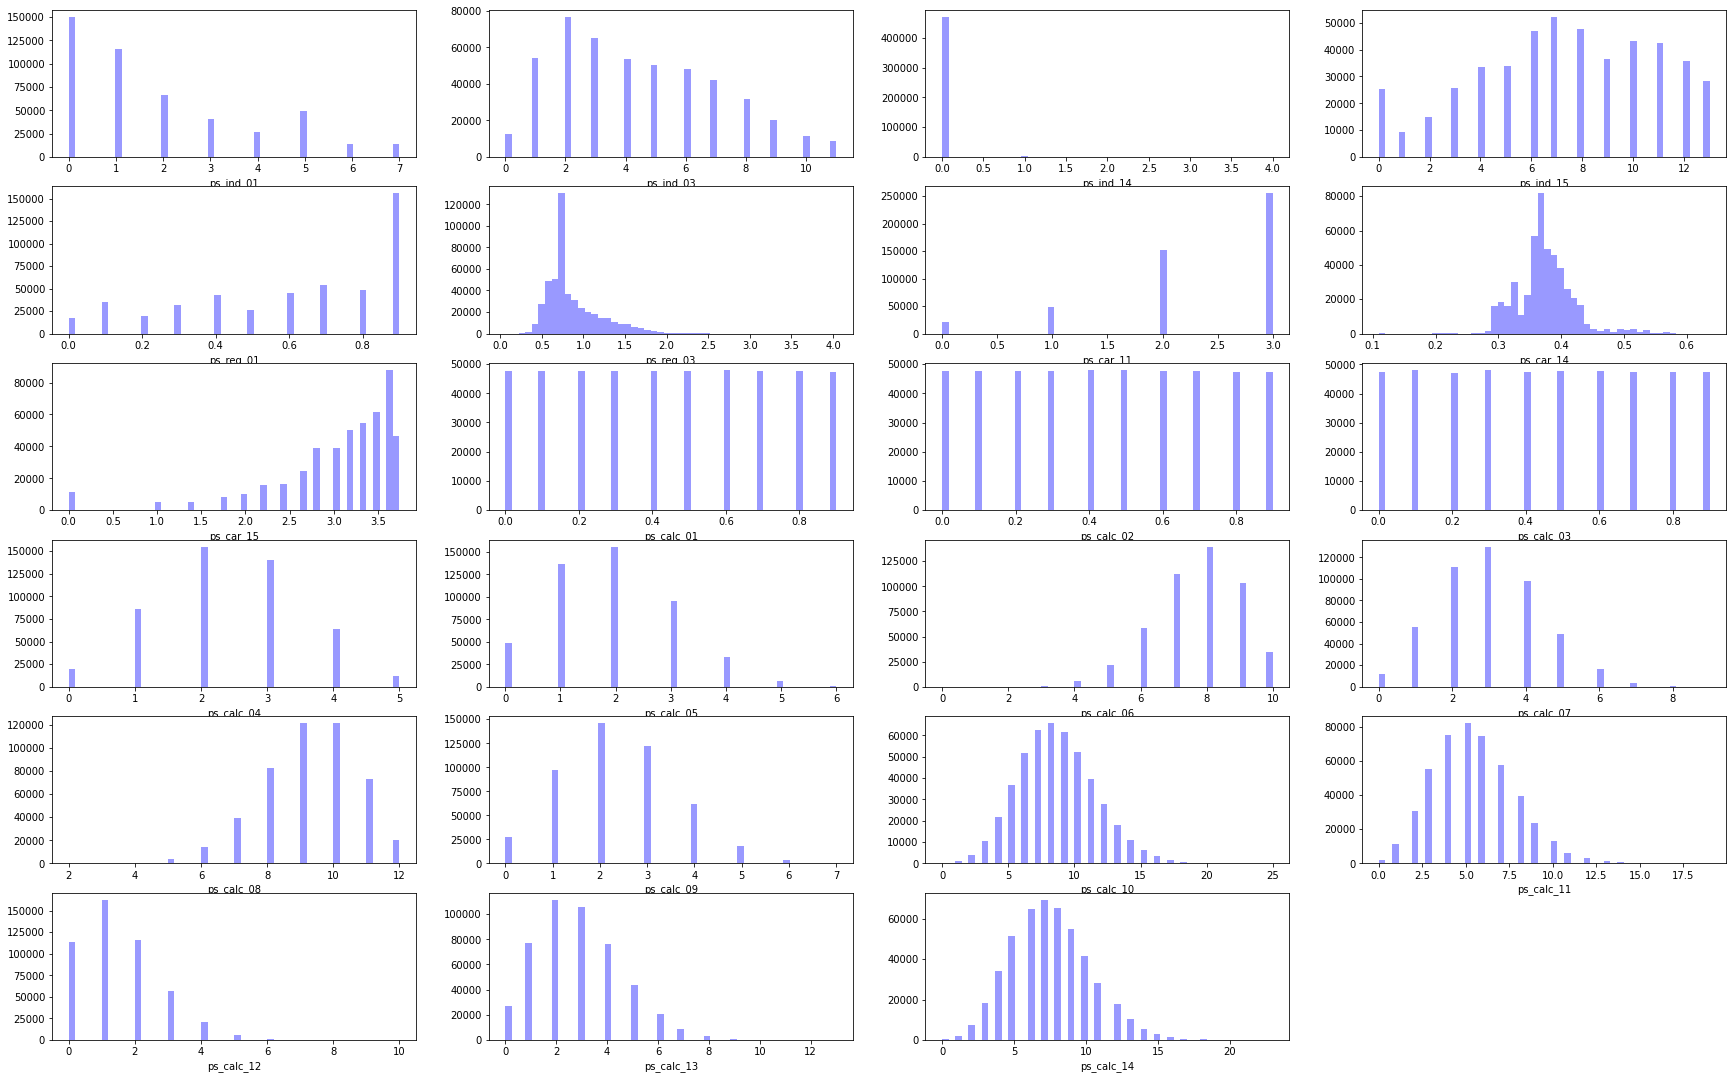

In [25]:
Numerical_features = X_train.columns.to_list()
#finding the numerical features by excluding categorical and binary features
num_features = [col for col in Numerical_features if ('cat' not in col and 'bin' not in col)]
print('No. of Numerical features : ', len(num_features))

n_row = len(num_features)
n_col = 4   
n_sub = 1      
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(num_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(X_train[num_features[i]], kde=False,color='blue')
    n_sub+=1
plt.show()

In [26]:
#As we are not aware of what each feature indicates, we will scale the below listed features with StandardScaler
std_features = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_03','ps_car_11',
 'ps_car_15','ps_calc_05','ps_calc_06','ps_calc_04','ps_calc_08','ps_calc_07',
 'ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13',
 'ps_calc_14']

In [27]:
#applying StandardScaler by fitting on training set and transform on training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[std_features])
X_train_scaled = pd.DataFrame(scaler.transform(X_train[std_features]), columns=std_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[std_features]), columns=std_features)
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(476169, 19)
(119043, 19)


In [28]:
# Replacing the feaures in x_train and x_test with scaled data
X_train = X_train.drop(std_features, axis=1)
X_train = X_train.join(X_train_scaled)

X_test = X_test.drop(std_features, axis=1)
X_test = X_test.join(X_test_scaled)

print(X_train.shape, X_test.shape)

(476169, 52) (119043, 52)


In [29]:
X_train.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_15,ps_calc_05,ps_calc_06,ps_calc_04,ps_calc_08,ps_calc_07,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,11,1,0,14,1,1,2,1,42,0.393700,0.7,0.3,0.3,1,1,0,1,1,0,1.057222,0.213085,-0.097573,0.198290,1.004489,0.565612,-0.415192,0.342962,-0.780189,0.981260,-1.226474,0.530667,0.704214,0.529867,0.883502,0.239502,0.464656,1.255411,3.081576
1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,6,1,0,11,1,1,2,1,17,0.390384,0.4,0.2,0.2,0,1,1,0,0,0,-0.454023,-0.527634,-0.097573,-0.647891,-0.038191,0.118398,-0.415192,0.544478,1.861971,0.232583,-0.331720,0.530667,-0.710575,-0.271935,-0.149277,-0.617707,-1.197357,0.075505,0.169037
2,1,0,6,1,0,0,0,0,0,0,0,1,0,0,7,1,0,1,1,1,2,1,65,0.352136,0.6,0.0,0.7,0,1,1,0,1,0,-0.454023,0.583444,-0.097573,-0.365831,-1.080872,-1.013973,0.786152,-1.822238,1.861971,-1.264771,-1.226474,0.530667,0.704214,1.331669,-0.837796,-0.189102,-0.366351,-1.104402,1.261239
3,2,0,0,0,0,0,1,0,0,0,0,0,1,0,3,1,0,0,1,1,2,1,32,0.367423,0.9,0.1,0.4,0,1,1,0,0,0,0.049725,-1.638711,-0.097573,-0.083771,-0.038191,-0.493785,-1.616536,-2.822530,-0.780189,-1.264771,-0.331720,-0.840696,-0.003181,-0.271935,-0.493537,-0.189102,1.295662,0.665458,-1.651300
4,2,0,0,0,0,1,0,0,0,0,0,0,0,1,7,1,0,0,1,1,1,1,87,0.361525,0.1,0.1,0.2,0,1,1,0,1,0,-0.454023,-0.897993,-0.097573,-1.212011,-1.080872,0.282822,0.786152,0.342962,-0.780189,0.981260,-0.331720,-0.155014,0.704214,-0.271935,-0.149277,1.096711,-1.197357,-1.104402,1.261239


In [30]:
X_test.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_15,ps_calc_05,ps_calc_06,ps_calc_04,ps_calc_08,ps_calc_07,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,11,1,0,11,1,0,2,0,101,0.321403,0.0,0.8,0.5,0,0,0,0,1,0,-0.957771,-1.268352,-0.097573,-0.929951,0.309369,-0.187894,0.786152,0.737758,0.100531,0.981260,0.563035,1.216349,1.411608,0.529867,-0.837796,-1.046311,2.126669,0.075505,-0.923165
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,6,1,0,6,1,1,0,1,104,0.417732,0.8,0.5,0.9,0,1,0,0,1,0,1.057222,-1.268352,-0.097573,0.198290,1.004489,0.522263,-0.415192,0.737758,0.100531,-0.516094,-0.331720,0.530667,0.704214,0.529867,-0.837796,0.239502,-0.366351,0.075505,-2.015367
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,11,0,1,0,1,1,2,1,75,0.444072,0.2,0.7,0.4,0,1,1,0,0,0,-0.454023,0.953803,-0.097573,-0.365831,0.656929,1.436158,-0.415192,0.342962,0.100531,-0.516094,-0.331720,-0.840696,-1.417970,1.331669,-0.149277,-0.617707,1.295662,-0.514449,0.169037
3,4,1,0,0,0,0,1,0,0,0,0,1,0,0,11,1,0,14,1,1,2,1,104,0.355668,0.7,0.5,0.7,1,1,1,1,0,0,-0.454023,2.064881,-0.097573,1.326530,1.004489,-0.665413,-1.616536,-0.841912,0.100531,0.981260,0.563035,1.902031,1.411608,1.331669,0.883502,1.096711,-1.197357,0.075505,-0.559098
4,2,0,6,1,0,0,0,0,0,0,0,0,0,0,4,1,0,1,1,1,0,1,64,0.361248,0.6,0.9,0.5,0,0,1,0,1,0,-0.957771,-1.638711,-0.097573,0.762410,0.656929,0.092241,-1.616536,-4.188955,0.100531,0.981260,1.457789,1.216349,-0.710575,0.529867,-0.149277,-0.189102,-0.366351,-1.104402,1.261239


**Principal Component Analysis**

As a next step in Dimensionality reduction, will apply Principal Component Analysis to reduce the features.

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
#fit PCA on training data
pca.fit(X_train)

print(pca.n_components_)

30


In [32]:
# Apply PCA  to transform both training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [33]:
print(X_train_pca.shape)

(476169, 30)


## Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#call the model
reg = LogisticRegression()
#fit the model
reg.fit(X_train_pca, y_train)
#predict
y_pred_reg = reg.predict(X_test_pca)

In [35]:
#evaluate the model performance
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.00      0.00      0.00      4410

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


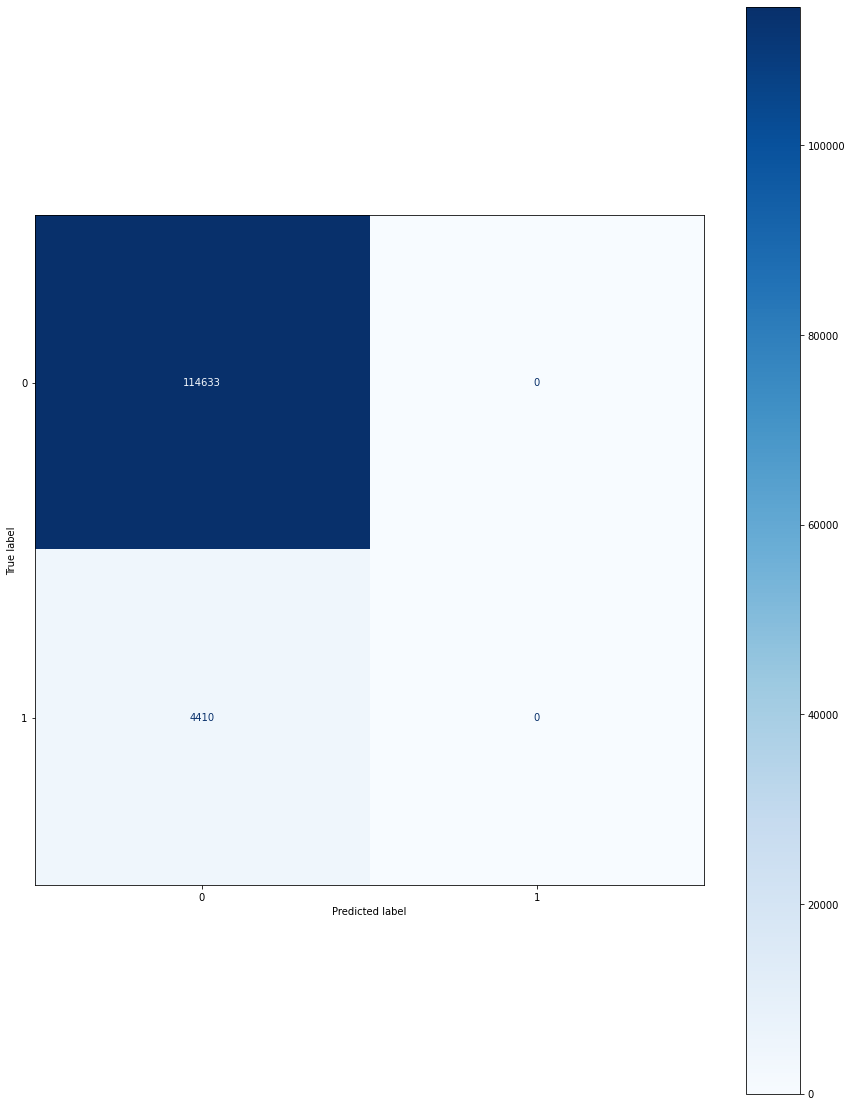

In [36]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(reg, X_test_pca, y_test, cmap='Blues', values_format='')

*   We can see the model achieved an accuracy of 96%. However, the model can achieve this accuracy just by predicting everything '0' due to imbalanced data set.
*  By looking at confusion matrix we can say that everything is predicted '0' which is of no use. Our model will fail to predict the claims and is of no use. 

*   The precision and f1_score for label '1' is '0.00' indicating the model is unable to predict any of the Claims. It just predicted everything as not-claimed.






### Dealing with the imbalanced data

We will train our model with the transformed data. The transformations will use are random undersampling, random oversampling and SMOTE over sampling.

In [38]:
#checking records on 12% balance with under_sampling and over_sampling
#undersampling
from imblearn.under_sampling import RandomUnderSampler 
undersampling = RandomUnderSampler(sampling_strategy = 0.12)
X_train_undersample, y_train_undersample = undersampling.fit_resample(X_train, y_train)
print("Training Records after 12% balance with under sampling:", X_train_undersample.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Records after 12% balance with under sampling: 161317


In [39]:
#oversampling
from imblearn.over_sampling import RandomOverSampler 
oversampling = RandomOverSampler(sampling_strategy = 0.12)
X_train_oversample, y_train_oversample = oversampling.fit_resample(X_train, y_train)
print("Training records after 12% balance with over sampling:",X_train_oversample.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training records after 12% balance with over sampling: 513951


---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') results:
training resampled shape (917770, 30)
value counts in each class (array([0, 1]), array([458885, 458885]))
              precision    recall  f1-score   support

           0       0.97      0.58      0.73    114633
           1       0.05      0.56      0.09      4410

    accuracy                           0.58    119043
   macro avg       0.51      0.57      0.41    119043
weighted avg       0.94      0.58      0.71    119043

---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') results:
training resampled shape (917770, 30)
value counts in each class (array([0, 1]), array([458885, 458885]))
              precision    recall  f1-score   support

           0       0.97      0.60      0.75    114633
           1       0.05      0.55      0.09      4410

    accuracy                           0.60    119043
   macro avg       0.51      0.58      0.42    119043
weighted avg       0.94      0.60      0.72    119043

---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomUnderSampler(random_state=42, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto') results:
training resampled shape (34568, 30)
value counts in each class (array([0, 1]), array([17284, 17284]))
              precision    recall  f1-score   support

           0       0.97      0.61      0.75    114633
           1       0.05      0.55      0.09      4410

    accuracy                           0.60    119043
   macro avg       0.51      0.58      0.42    119043
weighted avg       0.94      0.60      0.72    119043



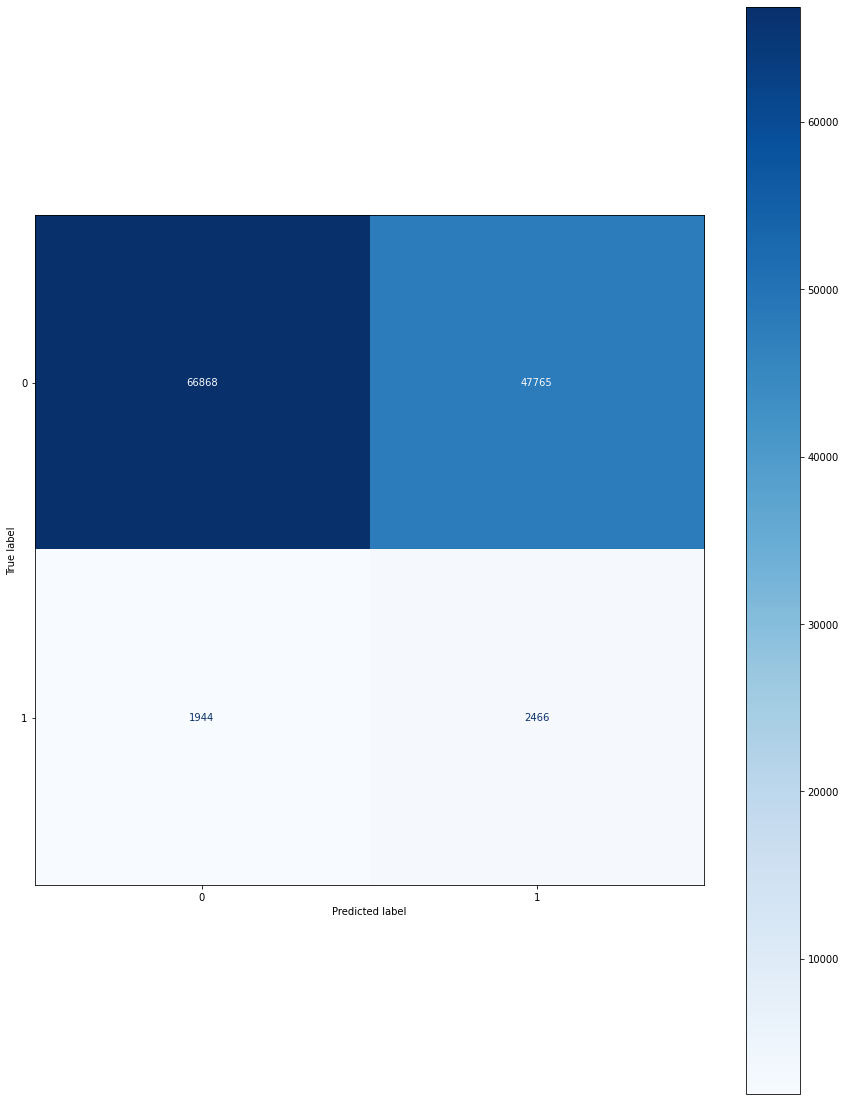

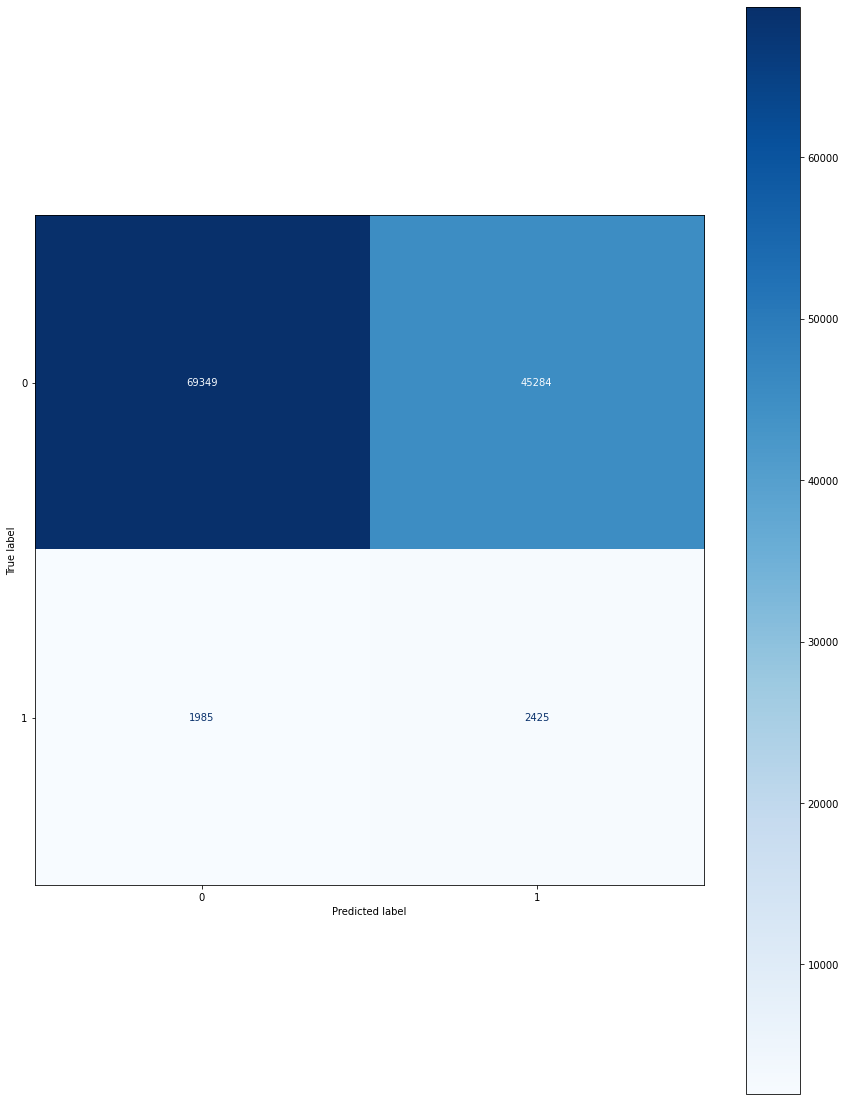

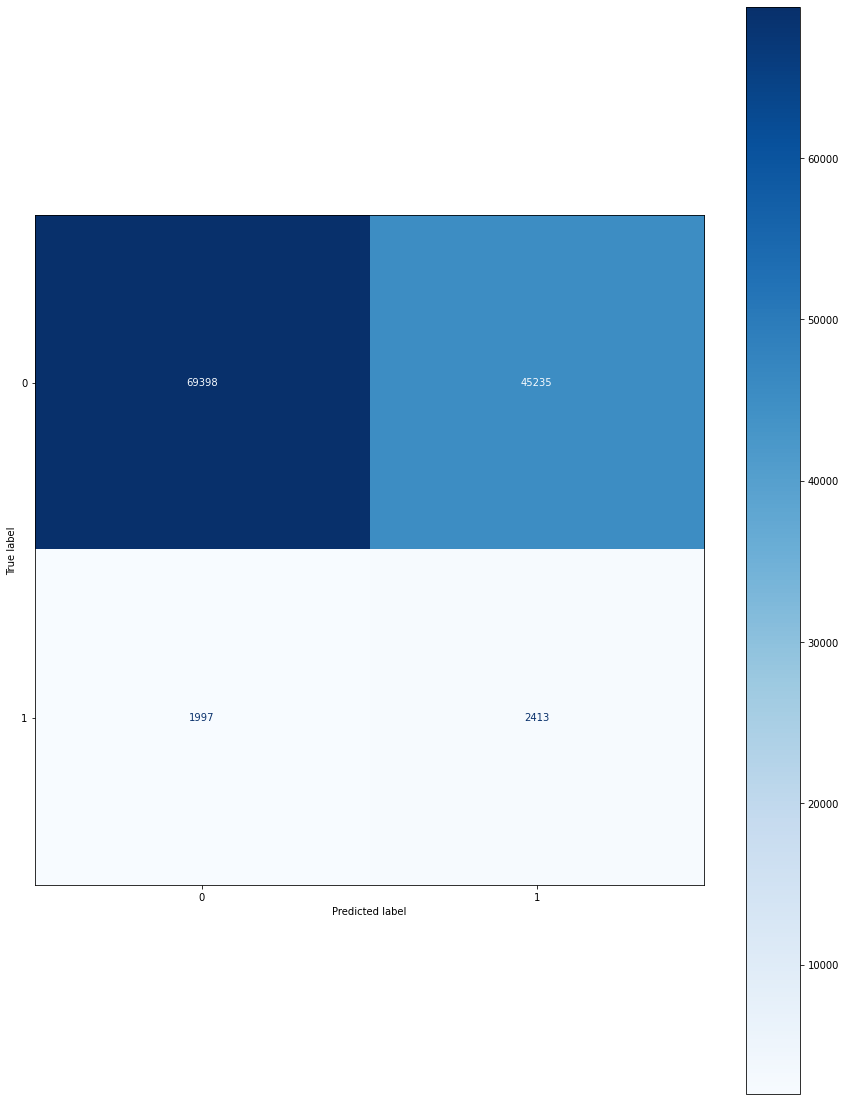

In [40]:
#import libraries
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

methods = [SMOTE, RandomOverSampler, RandomUnderSampler]
reg = LogisticRegression(random_state=42)

for sm in methods:
  print('---------------------------------------------')
  sm = sm(random_state=42)
  X_train_resampled, y_train_resampled = sm.fit_sample(X_train_pca, y_train)
  reg.fit(X_train_resampled, y_train_resampled)
  y_pred = reg.predict(X_test_pca)
  print(str(sm), 'results:')
  print('training resampled shape', X_train_resampled.shape)
  print('value counts in each class', np.unique(y_train_resampled, return_counts=True))
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(reg, X_test_pca, y_test, cmap='Blues', values_format='')



*   We can see improvement in model performance, the accuracy is realistic and our model is able to classify better compared to earlier model with imbalanced dataset.

*   There is improvement in the f1_score as the model is able to classify some claims accurately.


*   However, this performance is not up to the expectation, therefore, we can try with ensemble techniques.







# Ensemble Model - RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.00      0.00      0.00      4410

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



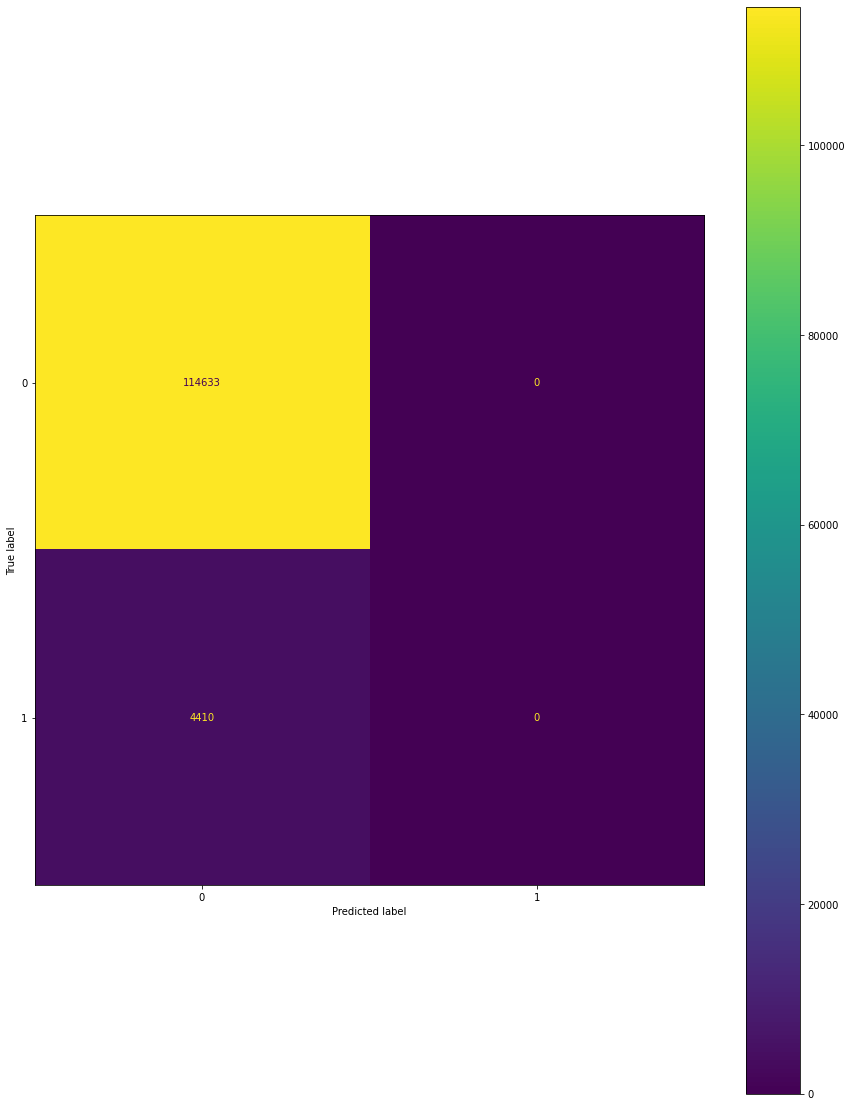

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(rf, X_test_pca, y_test, values_format='')



*   Random forest classifier is not effective on the imbalanced data. It gave the same results as simple Logistic Regression on imbalanced data.

*   The time taken by RandomForestClassifier is higher when compared to LogisticRegression



We will use the SMOTE for balancing the data and then use RandomForestClassifier

In [42]:
#get the resampled dataset
sampler = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = sampler.fit_sample(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
#train the model with resampled data
from time import time
rf_SMOTE = RandomForestClassifier()
start = time()
rf_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
end = time()
print("Execution Time:", (end-start)/60, 'mins')

Execution Time: 26.93709325393041 mins


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.06      0.01      0.01      4410

    accuracy                           0.96    119043
   macro avg       0.51      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



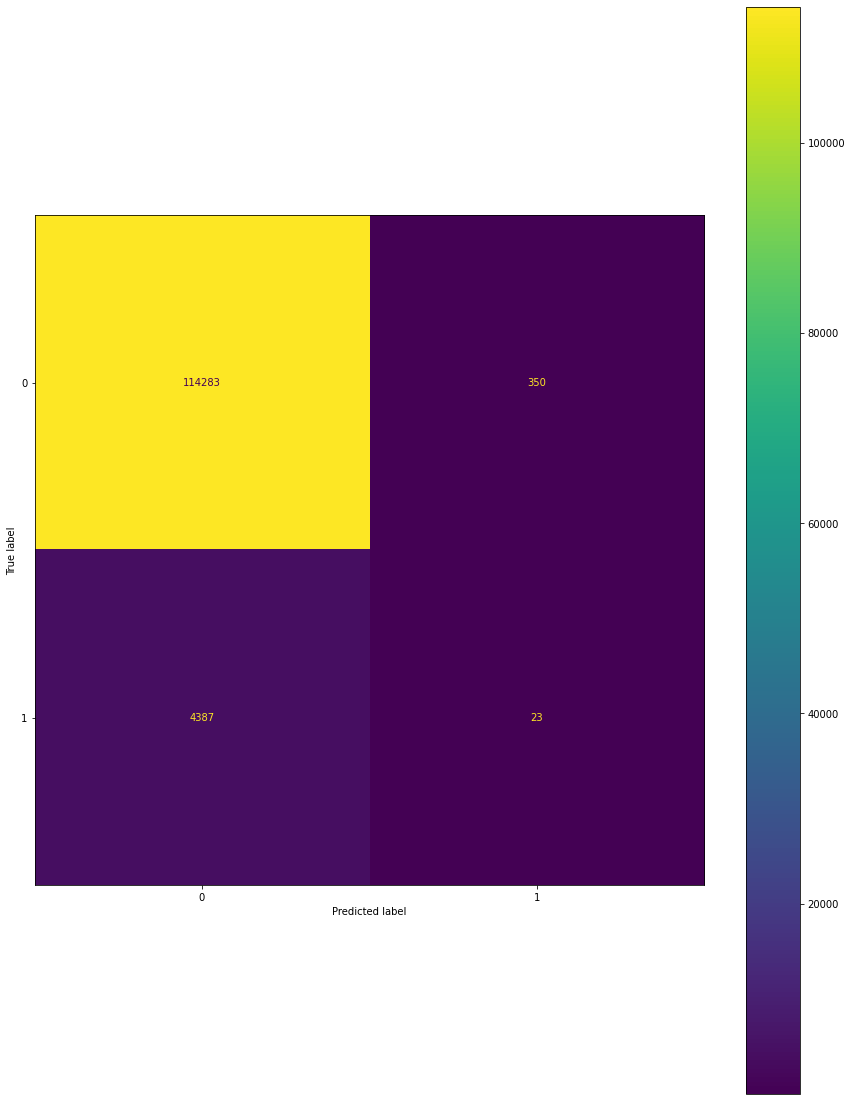

In [45]:
#evaluate
y_pred_rf_SMOTE = rf_SMOTE.predict(X_test_pca)
print(classification_report(y_test, y_pred_rf_SMOTE))
plot_confusion_matrix(rf_SMOTE, X_test_pca, y_test, values_format='')


*   We have better results from LogisticRegression compared to RandomForestClassifier.






## LinearSVC

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.00      0.00      0.00      4410

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



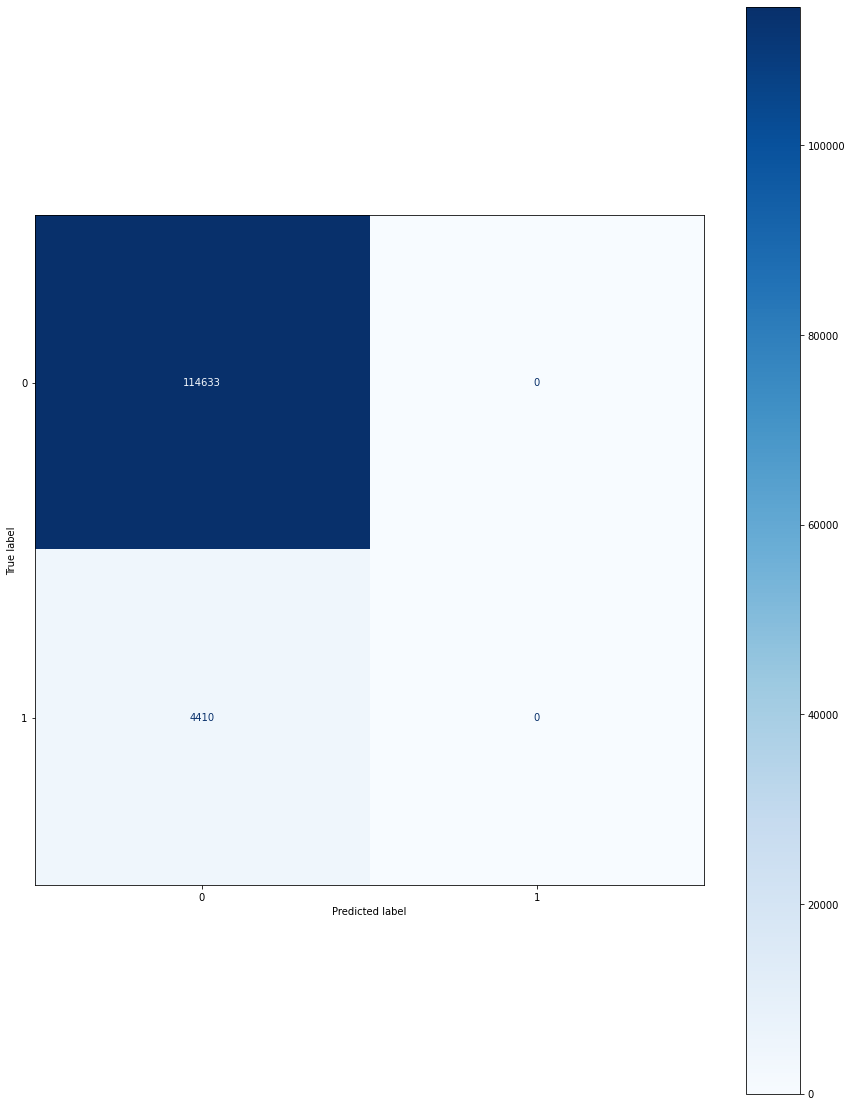

In [46]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

svc.fit(X_train_pca, y_train)
#evaluate
y_pred_svc = svc.predict(X_test_pca)
print(classification_report(y_test, y_pred_svc))
plot_confusion_matrix(svc, X_test_pca, y_test, cmap='Blues', values_format='')




*   We have same results on imbalanced data with LinearSVC as well. However, LinearSVC is faster than RandomForestClassifier.




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.96      0.55      0.70    114633
           1       0.04      0.47      0.07      4410

    accuracy                           0.55    119043
   macro avg       0.50      0.51      0.39    119043
weighted avg       0.93      0.55      0.68    119043



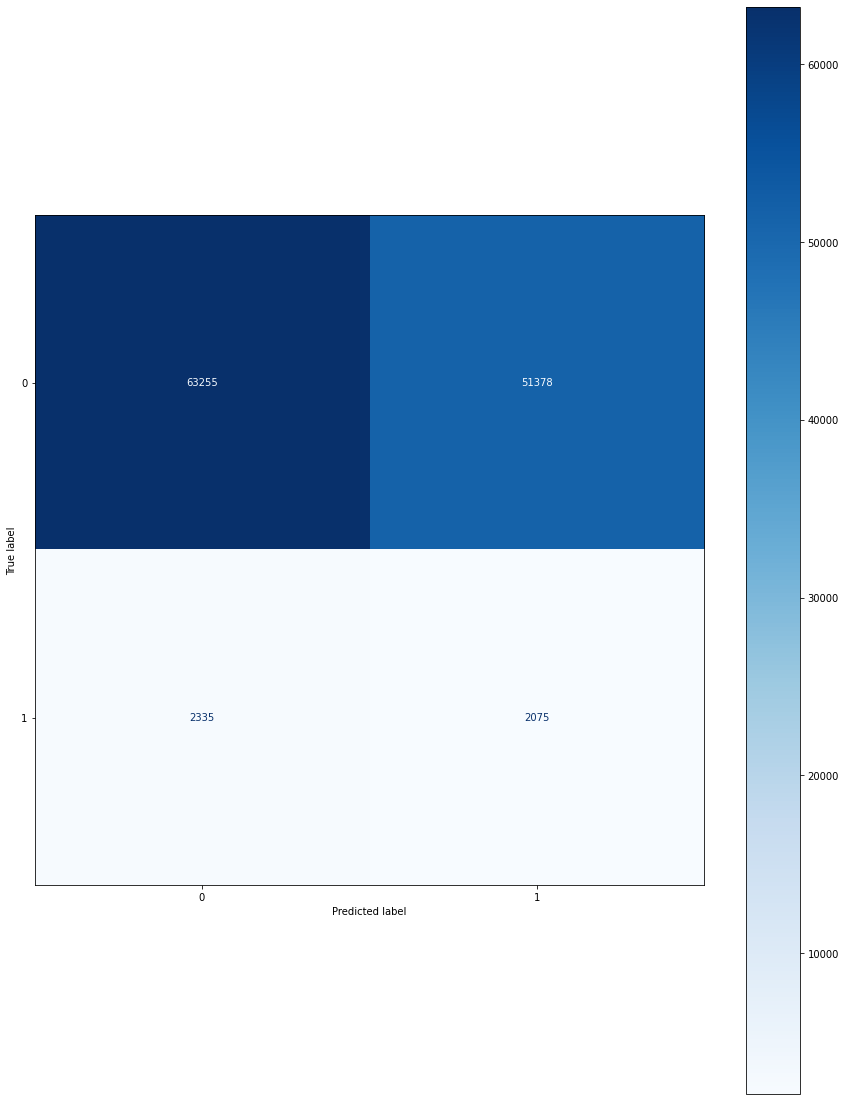

In [47]:
#train the model with balanced dataset
svc_SMOTE = LinearSVC(random_state=0)
svc_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

#evaluate the model
y_pred_svc_SMOTE = svc_SMOTE.predict(X_test_pca)
print(classification_report(y_test, y_pred_svc_SMOTE))
plot_confusion_matrix(svc_SMOTE, X_test_pca, y_test, cmap='Blues', values_format='')




*   We have similar results as of LogisticRegression. But it takes more time to run than Logistic Regression model







# LinearSVC - Hyperparameter Tuning

In [48]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import metrics

#balance the data with undersampler
samp = RandomUnderSampler(random_state=42)
X_train_usamp, y_train_usamp = samp.fit_sample(X_train_pca, y_train)

#define a set of parameters
params = {"dual": [True, False], "C":[0.5, 1.5], "max_iter":[100, 500]}

#define scorer based on f1_score
f1_scorer = make_scorer(metrics.f1_score, average='weighted', labels=[0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:

#define and fit GridSearchCV
gs = GridSearchCV(LinearSVC(), param_grid=params, scoring=f1_scorer, n_jobs=-1)
gs.fit(X_train_usamp, y_train_usamp)

print("Best Parameters:", gs.best_params_)
print("Best Estimator:", gs.best_estimator_)
print("Best Score:", gs.best_score_)


Best Parameters: {'C': 0.5, 'dual': False, 'max_iter': 100}
Best Estimator: LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best Score: 0.5761304794894089


              precision    recall  f1-score   support

           0       0.97      0.61      0.75    114633
           1       0.05      0.55      0.09      4410

    accuracy                           0.60    119043
   macro avg       0.51      0.58      0.42    119043
weighted avg       0.94      0.60      0.72    119043



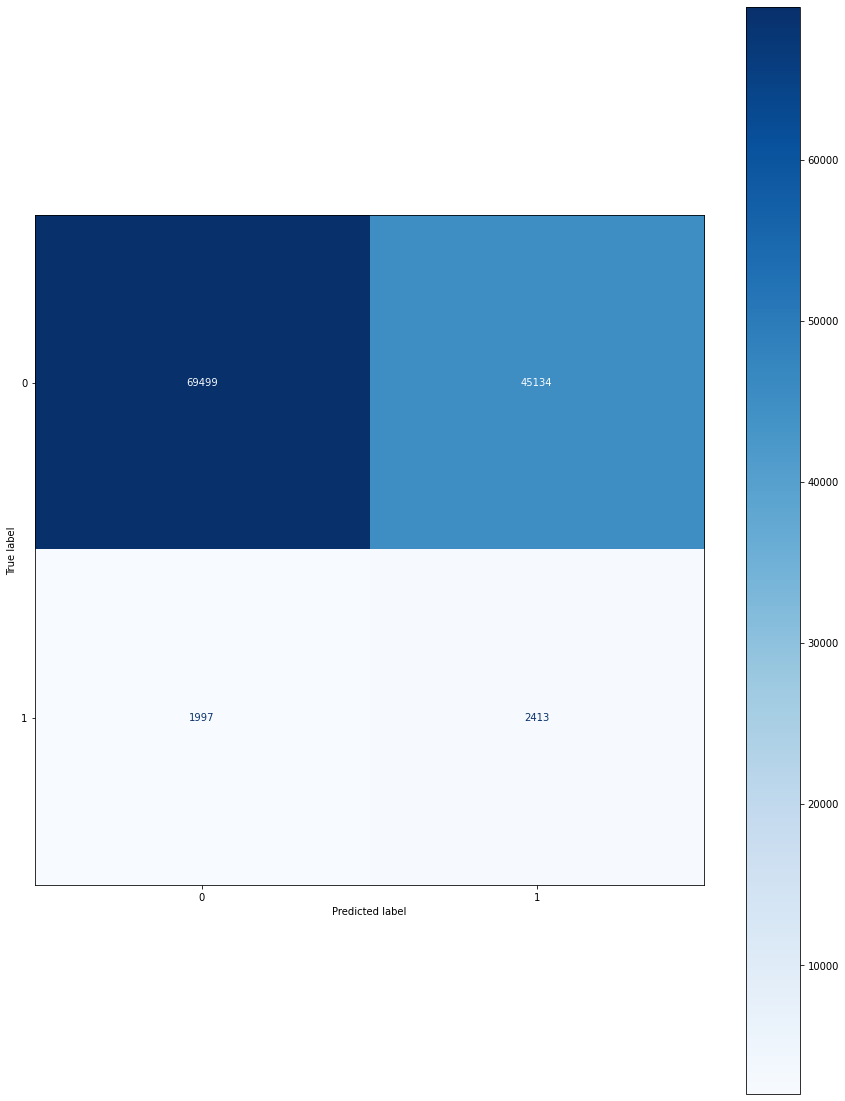

In [51]:
#evaluating with the best parameters
svc_best = gs.best_estimator_
y_pred_svc_best = svc_best.predict(X_test_pca)
print(classification_report(y_test, y_pred_svc_best))
plot_confusion_matrix(svc_best, X_test_pca, y_test, cmap='Blues', values_format='')

We still have the similar performance. There is small improvement in the weighted avg of f1_score.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.00      0.00      0.00      4410

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



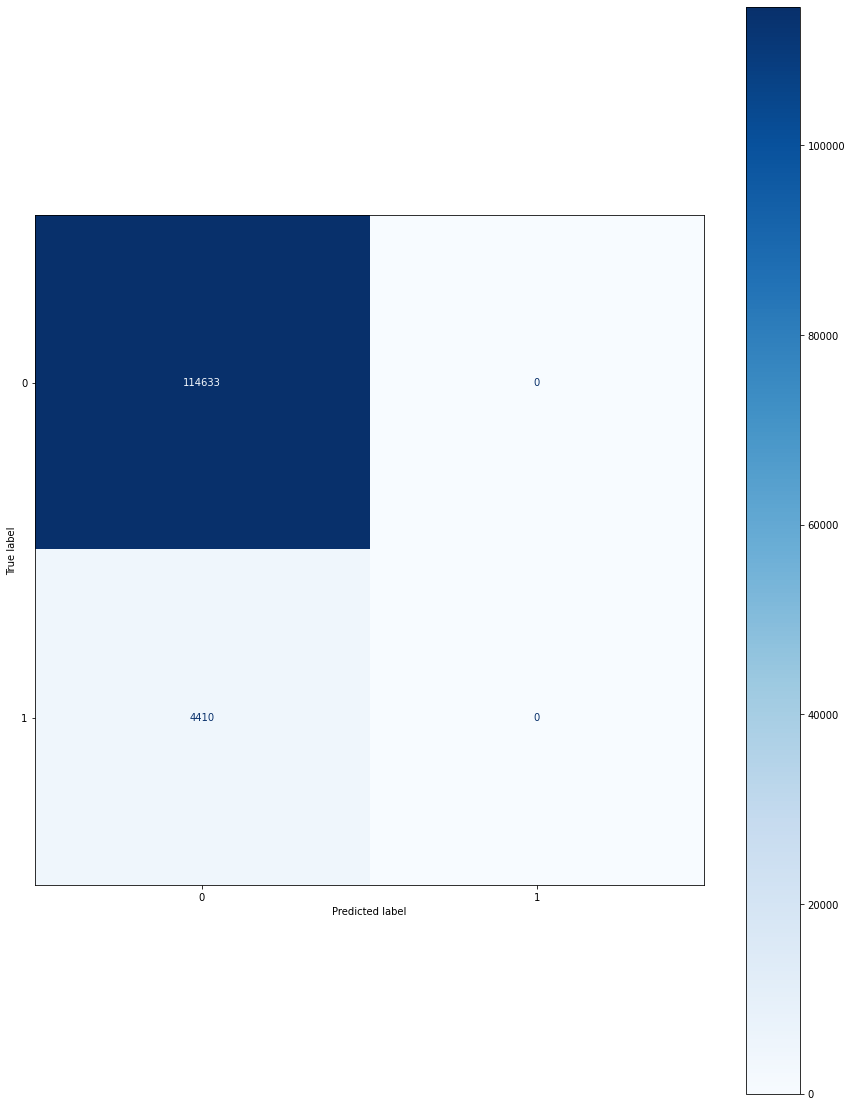

In [52]:
#training the model only with 100K records
svc_new = LinearSVC(random_state=0, dual=False, C=0.5, max_iter=100)
svc_new.fit(X_train_SMOTE[:100000], y_train_SMOTE[:100000])
#evaluate
y_pred_svc_new = svc_new.predict(X_test_pca)
print(classification_report(y_test, y_pred_svc_new))
plot_confusion_matrix(svc_new, X_test_pca, y_test, cmap='Blues', values_format='')

The performance dropped by using 100K records for training.

# XGBoost Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.00      0.00      0.00      4410

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



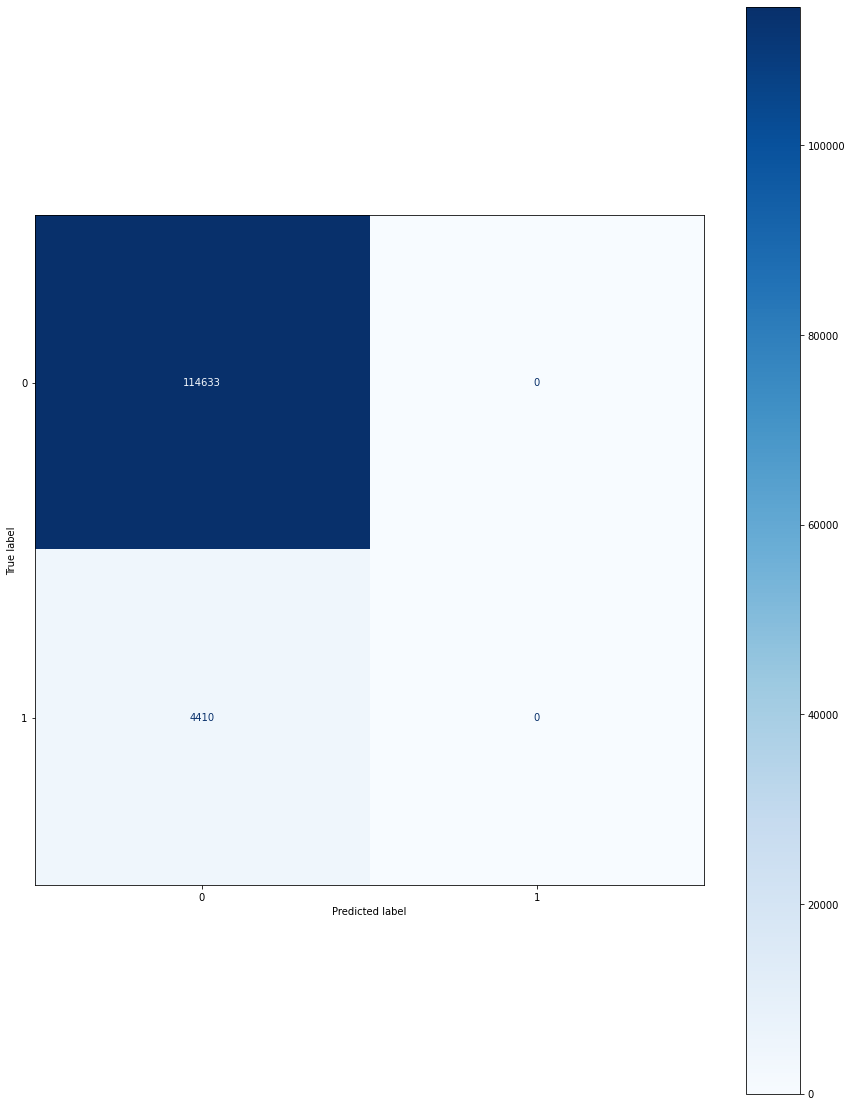

In [53]:
# Will use the XGBoost Classifier with default parameters on the imbalanced data first and check the performance
#import libraries
import xgboost as xgb
from xgboost import XGBClassifier

#Call the model
xgb_1 = XGBClassifier()
#fit the model
xgb_1.fit(X_train_pca, y_train)
# predict
y_pred_xgb = xgb_1.predict(X_test_pca)
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(xgb_1, X_test_pca, y_test, cmap='Blues', values_format='')

 

*  XGBClassifier results are also same with the imbalanced Data



              precision    recall  f1-score   support

           0       0.96      0.97      0.97    114633
           1       0.05      0.04      0.05      4410

    accuracy                           0.94    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.94      0.93    119043



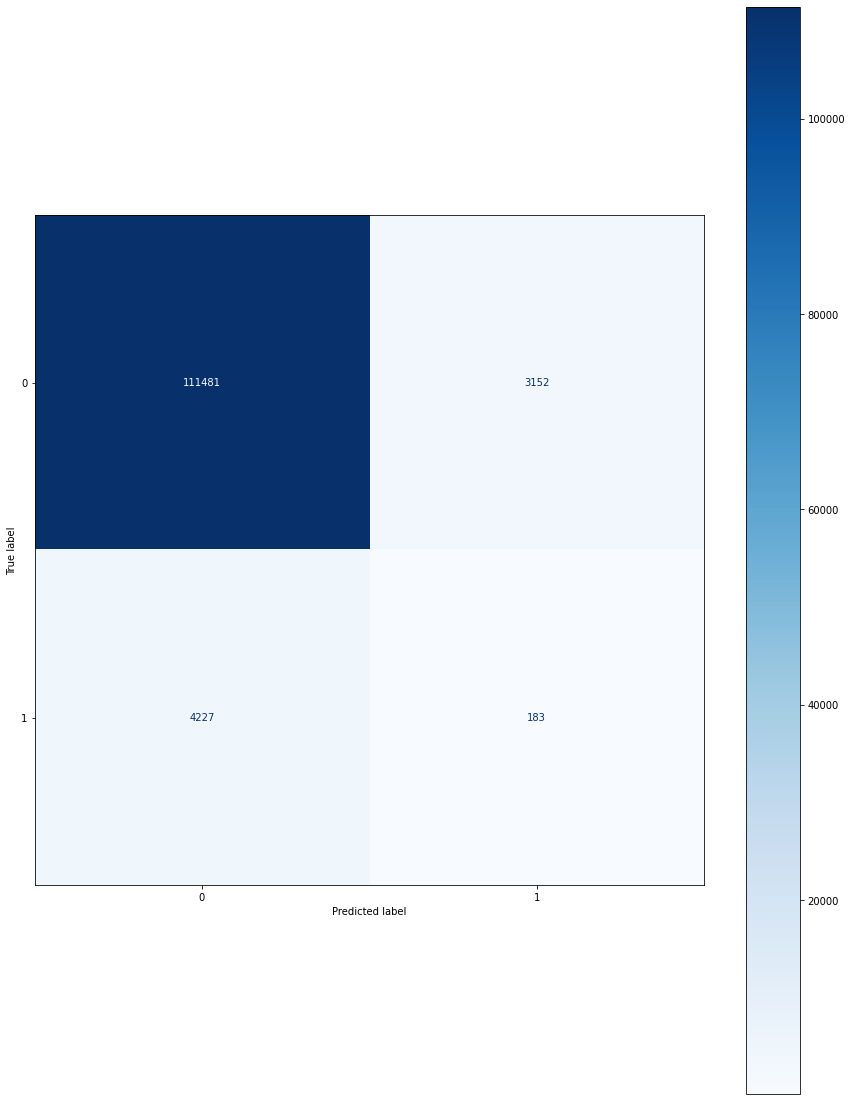

In [54]:
#XGBClassifier with resampled data
xgb_1 = XGBClassifier()
xgb_1.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_xgb = xgb_1.predict(X_test_pca)
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(xgb_1, X_test_pca, y_test, cmap='Blues', values_format='')



*   There is no improvement with XGBClassifier as well.




# One-hot Encoding

In [55]:
#prepare x and y from previous analysis
X_new = df_clean.drop(['id', 'target'], axis=1)

y_new = df_clean['target']

print(X.shape, y.shape)

(595212, 55) (595212,)


In [56]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(476169, 55) (119043, 55) (476169,) (119043,)


In [57]:
#dropping features based on our analysis earlier
X_train_new = X_train_new.drop(['ps_reg_02', 'ps_car_12', 'ps_car_13'], axis=1)
X_test_new = X_test_new.drop(['ps_reg_02', 'ps_car_12', 'ps_car_13'], axis=1)
print(X_train_new.shape, X_test_new.shape)

(476169, 52) (119043, 52)


In [60]:
# Reseting Index
X_train_new.reset_index(drop=True, inplace=True)
X_test_new.reset_index(drop=True, inplace=True)
X_train_new.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,1,5,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0.9,0.728011,7,1,0,14,1,1,2,1,42,2,0.393700,3.316625,0.8,0.8,0.6,3,3,8,3,10,3,8,4,4,3,11,0,0,1,0,1,0
1,0,1,7,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.0,0.837780,11,0,0,1,1,0,2,1,51,2,0.436348,3.741657,0.8,0.6,0.6,1,2,6,4,11,4,18,8,1,3,6,0,1,0,1,0,0
2,0,1,3,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.3,0.720677,11,1,0,9,1,1,2,1,21,3,0.313050,3.605551,0.0,0.1,0.9,0,1,9,6,10,3,11,5,2,3,10,0,0,0,0,0,0
3,0,3,4,0,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.9,0.692369,5,1,0,11,0,1,2,1,103,3,0.288791,3.605551,0.9,0.5,0.6,3,0,7,2,9,3,13,2,3,1,10,0,1,0,0,0,0
4,0,1,2,1,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.4,0.427931,7,1,0,11,1,1,0,1,11,2,0.368782,3.605551,0.2,0.8,0.9,4,1,6,3,8,2,11,8,3,6,11,0,0,0,0,1,1


In [61]:
#scaling numerical features, will use minmaxscaler this time
X_features = X_train.columns.tolist()
#finding the numerical features by excluding categorical and binary features
num_features = [n for n in X_features if ('cat' not in n and 'bin' not in n )]
print('No of Numerical Features:', len(num_features))
print(num_features)

No of Numerical Features: 23
['ps_car_14', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_03', 'ps_car_11', 'ps_car_15', 'ps_calc_05', 'ps_calc_06', 'ps_calc_04', 'ps_calc_08', 'ps_calc_07', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [62]:
#applying MinMaxScaler by fitting on training data and transform on training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_new[num_features])
X_train_scaled = pd.DataFrame(scaler.transform(X_train_new[num_features]), columns=num_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_new[num_features]), columns=num_features)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(476169, 23)
(119043, 23)


In [63]:
#replacing the features in x with scaled data
X_train_new = X_train_new.drop(num_features, axis=1)
X_train_new = X_train_new.join(X_train_scaled)

X_test_new = X_test_new.drop(num_features, axis=1)
X_test_new = X_test_new.join(X_test_scaled)

print(X_train_new.shape, X_test_new.shape)

X_train_new.head()

(476169, 52) (119043, 52)


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_15,ps_calc_05,ps_calc_06,ps_calc_04,ps_calc_08,ps_calc_07,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,7,1,0,14,1,1,2,1,42,0,0,1,0,1,0,0.539347,0.888889,0.888889,0.666667,0.285714,0.454545,0.0,0.153846,1.000000,0.167670,0.666667,0.886405,0.500000,0.8,0.6,0.8,0.333333,0.428571,0.32,0.210526,0.4,0.230769,0.478261
1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,11,0,0,1,1,0,2,1,51,0,1,0,1,0,0,0.620296,0.888889,0.666667,0.666667,0.000000,0.636364,0.0,0.615385,0.000000,0.195273,0.666667,1.000000,0.333333,0.6,0.2,0.9,0.444444,0.571429,0.72,0.421053,0.1,0.230769,0.260870
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,11,1,0,9,1,1,2,1,21,0,0,0,0,0,0,0.386266,0.000000,0.111111,1.000000,0.000000,0.272727,0.0,0.615385,0.333333,0.165825,1.000000,0.963624,0.166667,0.9,0.0,0.8,0.666667,0.428571,0.44,0.263158,0.2,0.230769,0.434783
3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,5,1,0,11,0,1,2,1,103,0,1,0,0,0,0,0.340221,1.000000,0.555556,0.666667,0.000000,0.363636,0.0,0.846154,1.000000,0.158707,1.000000,0.963624,0.000000,0.7,0.6,0.7,0.222222,0.428571,0.52,0.105263,0.3,0.076923,0.434783
4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,7,1,0,11,1,1,0,1,11,0,0,0,0,1,1,0.492050,0.222222,0.888889,1.000000,0.000000,0.181818,0.0,0.769231,0.444444,0.092210,0.666667,0.963624,0.166667,0.6,0.8,0.6,0.333333,0.285714,0.44,0.421053,0.3,0.461538,0.478261


In [64]:
#listing out the categorical features
cat_features = [c for c in X_features if ('cat' in c)]
print('No of Numerical Features:', len(num_features))
print(cat_features)

No of Numerical Features: 23
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [68]:
#onehot encoding the categorical features
import pandas as pd
X_train_new = pd.get_dummies(X_train_new, columns=cat_features, drop_first=True)
print(f'After one-hot encoding we have {X_train_new.shape[1]} variables in train')

After one-hot encoding we have 199 variables in train


In [70]:
X_train_new.shape

(476169, 199)

In [71]:
X_test_new = pd.get_dummies(X_test_new, columns=cat_features, drop_first=True)
print(f'After dummification we have {X_test_new.shape[1]} variables in test')

After dummification we have 199 variables in test


# Neural Network - MLPClassifier

In [73]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150, 150, 150), learning_rate='adaptive', random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       0.96      0.99      0.98    114633
           1       0.05      0.01      0.02      4410

    accuracy                           0.96    119043
   macro avg       0.51      0.50      0.50    119043
weighted avg       0.93      0.96      0.94    119043



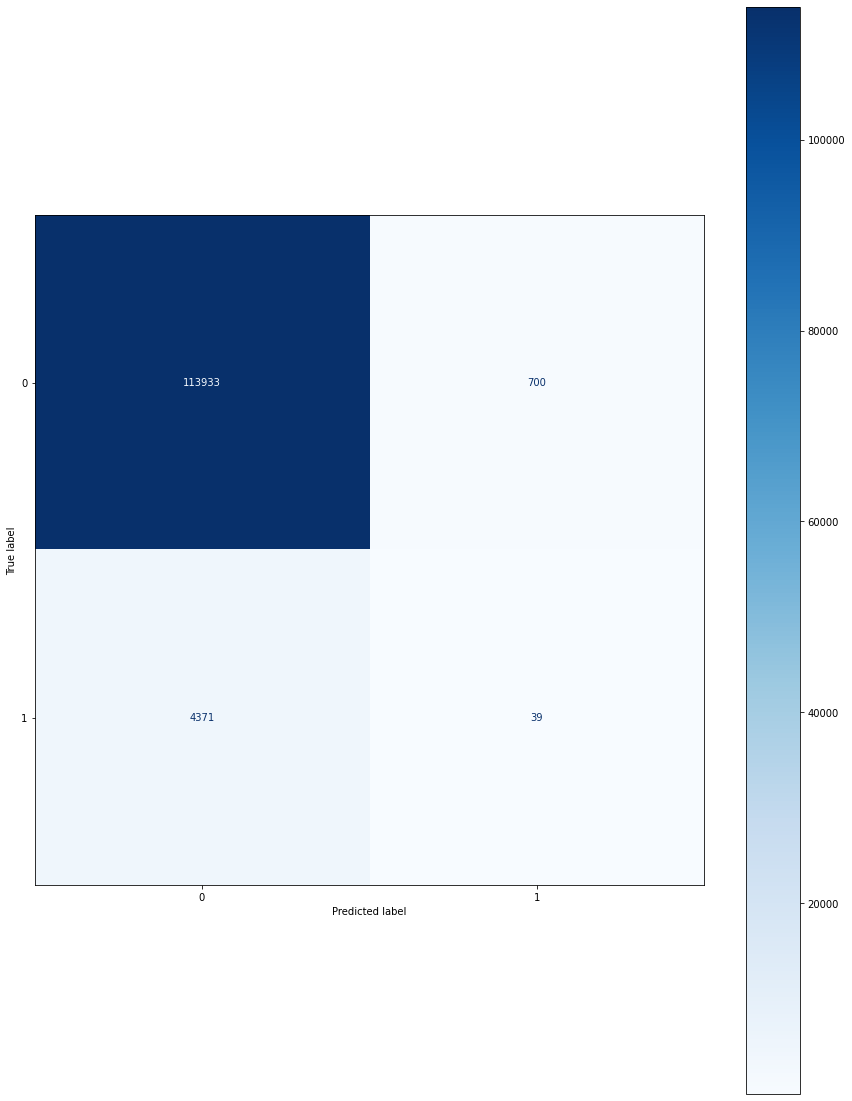

In [74]:
#training the model on imbalanced data
mlp.fit(X_train_pca, y_train)
#evaluate the model
y_pred_mlp = mlp.predict(X_test_pca)
print(classification_report(y_test, y_pred_mlp))
plot_confusion_matrix(mlp, X_test_pca, y_test, cmap='Blues', values_format='')


*   MLPClassifier performed better on imbalanced data compared to the other classifiers we used so far.
*   We can see better f1_score, whereas all other models had 0 score on imbalanced data.



              precision    recall  f1-score   support

           0       0.97      0.51      0.66    114633
           1       0.04      0.55      0.08      4410

    accuracy                           0.51    119043
   macro avg       0.50      0.53      0.37    119043
weighted avg       0.93      0.51      0.64    119043



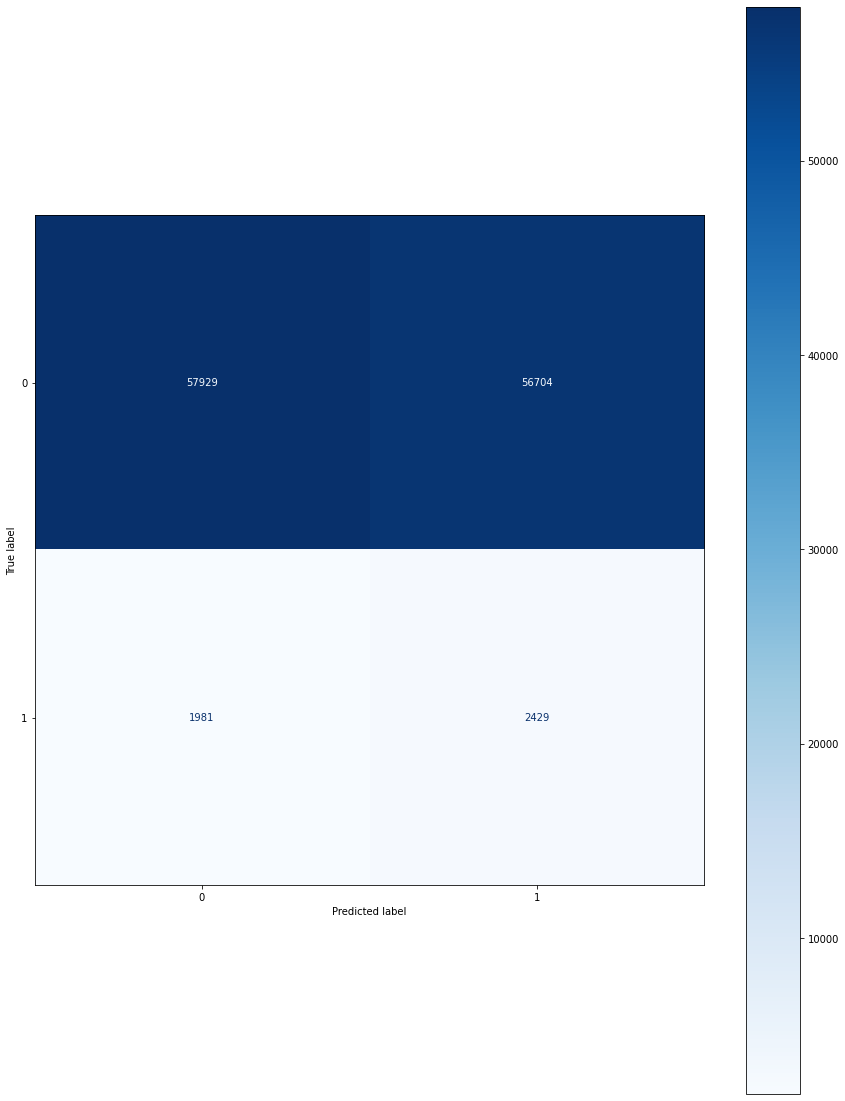

In [75]:
# training the MLPClassifier with balanced data to see if we get improved results.Using undersampled data considering the resources and execution time taken.
mlp_usamp = MLPClassifier(hidden_layer_sizes=(150, 150, 150), learning_rate='adaptive', random_state=42)
mlp_usamp.fit(X_train_usamp, y_train_usamp)

#evaluate the model
y_pred_mlp_usamp = mlp_usamp.predict(X_test_pca)
print(classification_report(y_test, y_pred_mlp_usamp))
plot_confusion_matrix(mlp_usamp, X_test_pca, y_test, cmap='Blues', values_format='')

In [76]:
#Will do a GridSearchCV with different layer sizes
#define a set of parameters
params = {'hidden_layer_sizes':[(61), (61,31), (61,31,15)]}

#define scorer based on f1_score
f1_scorer = make_scorer(metrics.f1_score, average='weighted', labels=[0, 1])

gs = GridSearchCV(MLPClassifier(), param_grid=params, scoring=f1_scorer, n_jobs=-1)
gs.fit(X_train_usamp, y_train_usamp)

print("Best Parameters:", gs.best_params_)
print("Best Estimator:", gs.best_estimator_)
print("Best Score:", gs.best_score_)

Best Parameters: {'hidden_layer_sizes': 61}
Best Estimator: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=61, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Best Score: 0.5634633879462108




*   Cross validation indicates single hidden layer has better performance.





# MLP Classifier - OneHotEncoded Data

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp_new = MLPClassifier(hidden_layer_sizes=(200), random_state=42)

In [79]:
#train the model and evaluate
mlp_new.fit(X_train_new, y_train_new)

#evaluate the model
y_pred_mlp_new = mlp_new.predict(X_test_new)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.08      0.01      0.02      4385

    accuracy                           0.96    119043
   macro avg       0.52      0.50      0.50    119043
weighted avg       0.93      0.96      0.94    119043



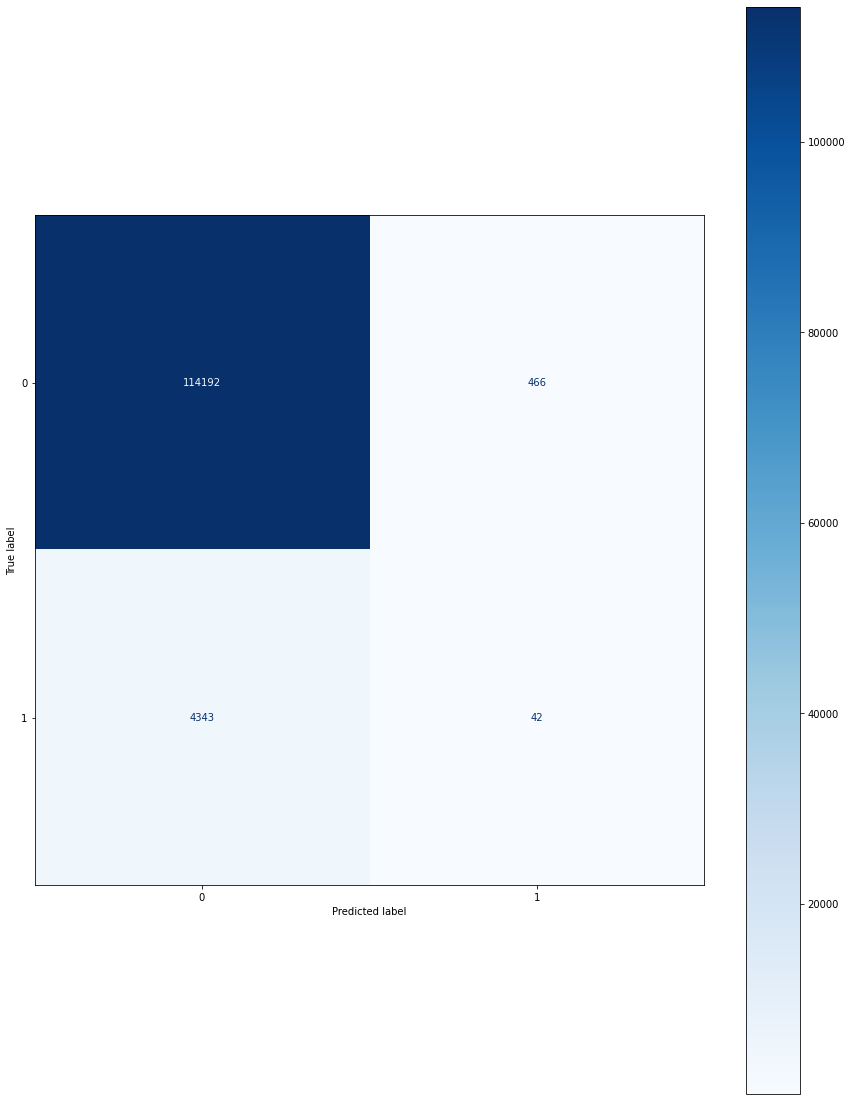

In [80]:
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test_new, y_pred_mlp_new))
plot_confusion_matrix(mlp_new, X_test_new, y_test_new, cmap='Blues', values_format='')

In [81]:
#balance the data with undersampler
from imblearn.under_sampling import RandomUnderSampler
samp_new = RandomUnderSampler(random_state=42)
X_train_usamp_new, y_train_usamp_new = samp_new.fit_sample(X_train_new, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.97      0.55      0.70    114658
           1       0.04      0.52      0.08      4385

    accuracy                           0.55    119043
   macro avg       0.51      0.54      0.39    119043
weighted avg       0.93      0.55      0.68    119043



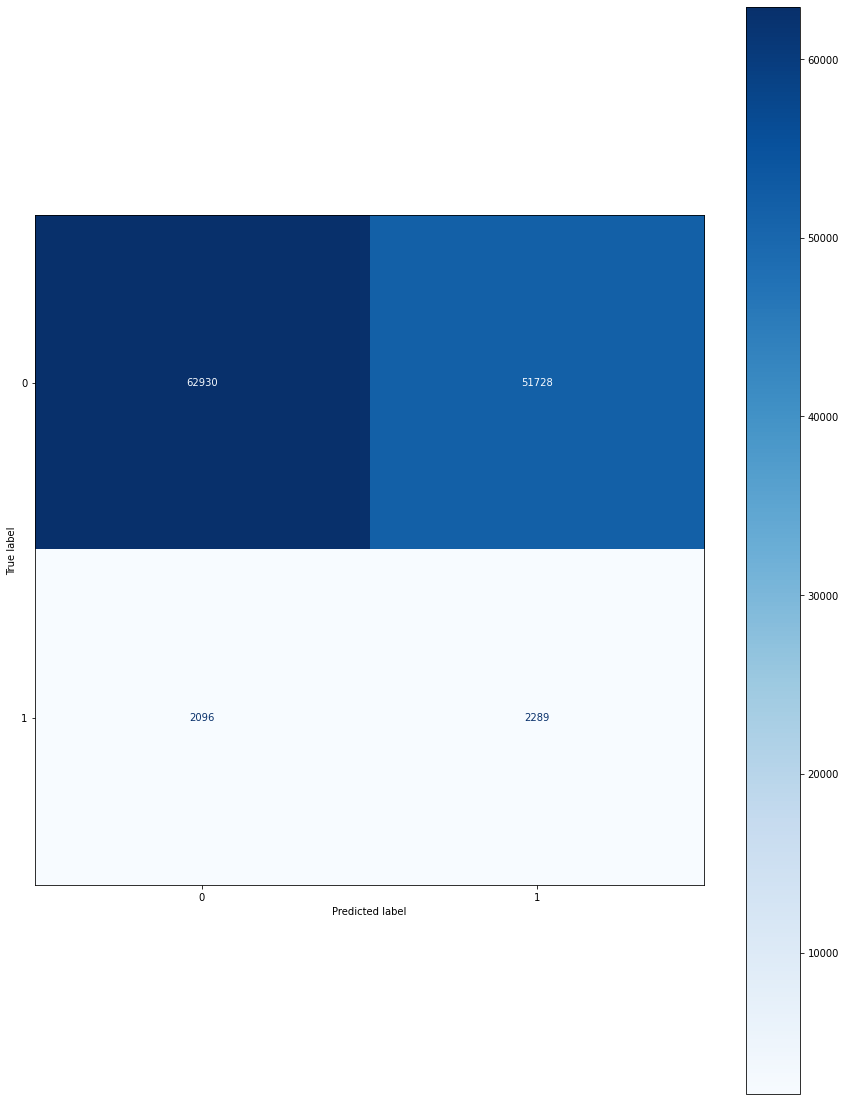

In [83]:
#will apply the MLPClassifier on balanced data
mlp_usamp_new = MLPClassifier(hidden_layer_sizes=(200), random_state=42)
mlp_usamp_new.fit(X_train_usamp_new, y_train_usamp_new)

#evaluate the model
y_pred_mlp_usamp_new = mlp_usamp_new.predict(X_test_new)
print(classification_report(y_test_new, y_pred_mlp_usamp_new))
plot_confusion_matrix(mlp_usamp_new, X_test_new, y_test_new, cmap='Blues', values_format='')

# Challenges Faced


There were many challenges in this problem which were mainly from the data while some from the algorithms.

*   The imbalance of the dataset was challenging. Learning how to do resampling, and why we should or should not do the resampling was a challenge. And the resampling techniques have their own drawbacks.
*   Classifiers took a long time in execution

*   Feature engineering was very hard, because we don't know about the different features and to get the intution without knowing the domain and features exact name was difficult






